# Ville de Paris - programme "Végétalisons la ville"

# Data is for Good - aidons Paris à devenir une smart-city !

##### Analyse exploratoire - Arbres de la ville de Paris<a class="anchor" id="titre"></a>
![](imageArbresParis.jpg)

Dans le cadre de sa politique Espaces Verts, la ville de Paris s'est associée avec l'ONG Data is for Good pour proposer un concours. Le challenge consiste à analyser un jeu de données portant sur les arbres de la Ville de Paris.
l'objectif des services de la mairie est demieux comprendre ses données et à termes d'optimiser les tournées d'entretien de ses agents.

### Table des matières
* [Data is for Good & Ville de Paris](#titre)
* [PARTIE 1 - PRÉSENTATION GÉNÉRALE DU JEU DE DONNÉES](#P1)
    * [1.1) Importation du jeu de données et des librairies Python utiles](#11)
    * [1.2) Caractéristiques générales du dataframe généré](#12)
    * [1.3) des valeurs manquantes ?](#13)
    * [1.4) Mesures statistiques sur les données brutes](#14)
* [PARTIE 2 - DÉMARCHE MÉTHODOLOGIQUE D'ANALYSE DE DONNÉES](#P2)
    * [2.1) Regardons les colonnes plus en détail](#21)
    * [2.2) Nettoyage](#22)
* [PARTIE 3 - SYNTHÈSE DE L'ANALYSE DE DONNÉES](#P3)



# PARTIE 1 - PRÉSENTATION GÉNÉRALE DU JEU DE DONNÉES<a class="anchor" id="P1"></a>

## 1.1) Importation du jeu de données et des librairies Python utiles <a class="anchor" id="11"></a>

Comme demandé dans le cahier des charges, nous allons explorer le jeu de données avec le langage Python sur un Jupyther Notebook.

Les librairies utilisées seront :

In [1]:
import pandas as pd #to manipulate the dataset with dataframes
import numpy as np #for statistics and calculations
import matplotlib.pyplot as plt #for data visualisation
%matplotlib inline
import seaborn as sns #for data visualisation, with different proporties
import scipy.stats as st #for other statistics
import missingno as ms #for visualisation of missing data

Le data set fourni est mis à disposition par la ville de Paris et contient des informations sur les arbres dont la ville a en charge l'entretien.
En voici une importation brute :

In [2]:
dataBrute=pd.read_csv("p2-arbres-fr.csv", sep=';') #import data set in an dataframe

display(dataBrute.head())

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


## 1.2) Caractéristiques générales du dataframe généré<a class="anchor" id="12"></a>

Déterminons dans un premier temps ses dimensions :

In [3]:
print("La data set comporte ",dataBrute.shape[0]," lignes et ",dataBrute.shape[1]," colonnes") #dimensions of the dataframe

La data set comporte  200137  lignes et  18  colonnes


Ensuite regardons les types de valeur de chaque colonne (utile pour savoir de quoi il retourne et comment les manipuler):

In [4]:
display(dataBrute.dtypes)

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

`int` correspond à des nombres entiers, `float` à des nombres décimaux et `object` à des données textuelles.

Tout à l'air normal, sauf peut-être la colonne `id_emplacement` , qu'intuitivement, on aurait imaginé en entier. Peut-être des différences ou erreurs de formatage ?

On pourrait penser que la colonne `arrondissmement` serait plus "pratique" en type entier. A voir.

On peut essayer aussi de décrire succintement à quoi correspond chaque colonne. 

In [5]:
# Description of each column, in a numpy array
colDescripVar=np.array([
    "identifiant de chaque arbre sur la forme d'un numéro",
    "type de végétal",
    "type d'espace public où se situe l'arbre",
    "arrondissement de Paris",
    "complément d'adresse",
    "numéro de l'adresse",
    "adresse de l'arbre",
    "identifiant de l'emplacement",
    "nom de l'espèce en langage commun",
    "genre de l'arbre",
    "nom de l'espèce en latin",
    "variété de l'espèce",
    "circonférence en centimètres",
    "hauteur en mètres",
    "stade de développement, reflète l'âge",
    "précise si oui ou non l'arbre est remarquable",
    "latitude",
    "longitude"]
)
# the array is transformed into a column 
colDescripVar=colDescripVar.reshape(len(colDescripVar),1)

On remarque que ces colonnes peuvent être classées en différents groupes :
- biométrie : décrire les arbres ou quantifier leurs caractéristiques
- localisation : repérer chaque arbre dans Paris
- identification : donner un numéro ou une chaine de caractère unique

In [6]:
# create a columns for groups
colGroupVar=np.array([
    "identification",
    "biométrie",
    "localisation",
    "localisation",
    "localisation",
    "localisation",
    "localisation",
    "identification",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "biométrie",
    "localisation",
    "localisation"
])
colGroupVar=colGroupVar.reshape(len(colGroupVar),1)

#put both arrays in a numpy board
tabInfos=np.hstack((colDescripVar,colGroupVar,))

Pour plus de lisibilité, on place ces informations dans un dataframe, que l'on nomme `dataInfos`.

In [7]:
#numpy board into pandas dataframe
dataInfos=pd.DataFrame(index=dataBrute.columns,data=tabInfos,columns=["Description colonne","Groupe colonne"])

display(dataInfos)

,Description colonne,Groupe colonne
id,identifiant de chaque arbre sur la forme d'un ...,identification
type_emplacement,type de végétal,biométrie
domanialite,type d'espace public où se situe l'arbre,localisation
arrondissement,arrondissement de Paris,localisation
complement_addresse,complément d'adresse,localisation
numero,numéro de l'adresse,localisation
lieu,adresse de l'arbre,localisation
id_emplacement,identifiant de l'emplacement,identification
libelle_francais,nom de l'espèce en langage commun,biométrie
genre,genre de l'arbre,biométrie


## 1.3) des valeurs manquantes ?<a class="anchor" id="13"></a>

On peut s'intéresser aussi aux valeurs manquantes de notre jeu de données. On rajoute dans le tableau `dataInfos` :
- une colonne avec le nombre de valeurs `NaN` (pour *Not a Number*)
- une colonne avec la même information en pourcentage

In [8]:
dataInfos["Nb NaN"]=dataBrute.isna().sum() #count the number of missing values in each column
dataInfos["% NaN"]=(round(dataBrute.isna().mean()*100)).astype(int).astype(str)+" %" #determine proportion of missing values 
# for each column
display(dataInfos)

,Description colonne,Groupe colonne,Nb NaN,% NaN
id,identifiant de chaque arbre sur la forme d'un ...,identification,0,0 %
type_emplacement,type de végétal,biométrie,0,0 %
domanialite,type d'espace public où se situe l'arbre,localisation,1,0 %
arrondissement,arrondissement de Paris,localisation,0,0 %
complement_addresse,complément d'adresse,localisation,169235,85 %
numero,numéro de l'adresse,localisation,200137,100 %
lieu,adresse de l'arbre,localisation,0,0 %
id_emplacement,identifiant de l'emplacement,identification,0,0 %
libelle_francais,nom de l'espèce en langage commun,biométrie,1497,1 %
genre,genre de l'arbre,biométrie,16,0 %


La fonction `missingno.matrix()` permet de visualiser ces valeurs manquantes et d'appréhender simplement la problèmatique :

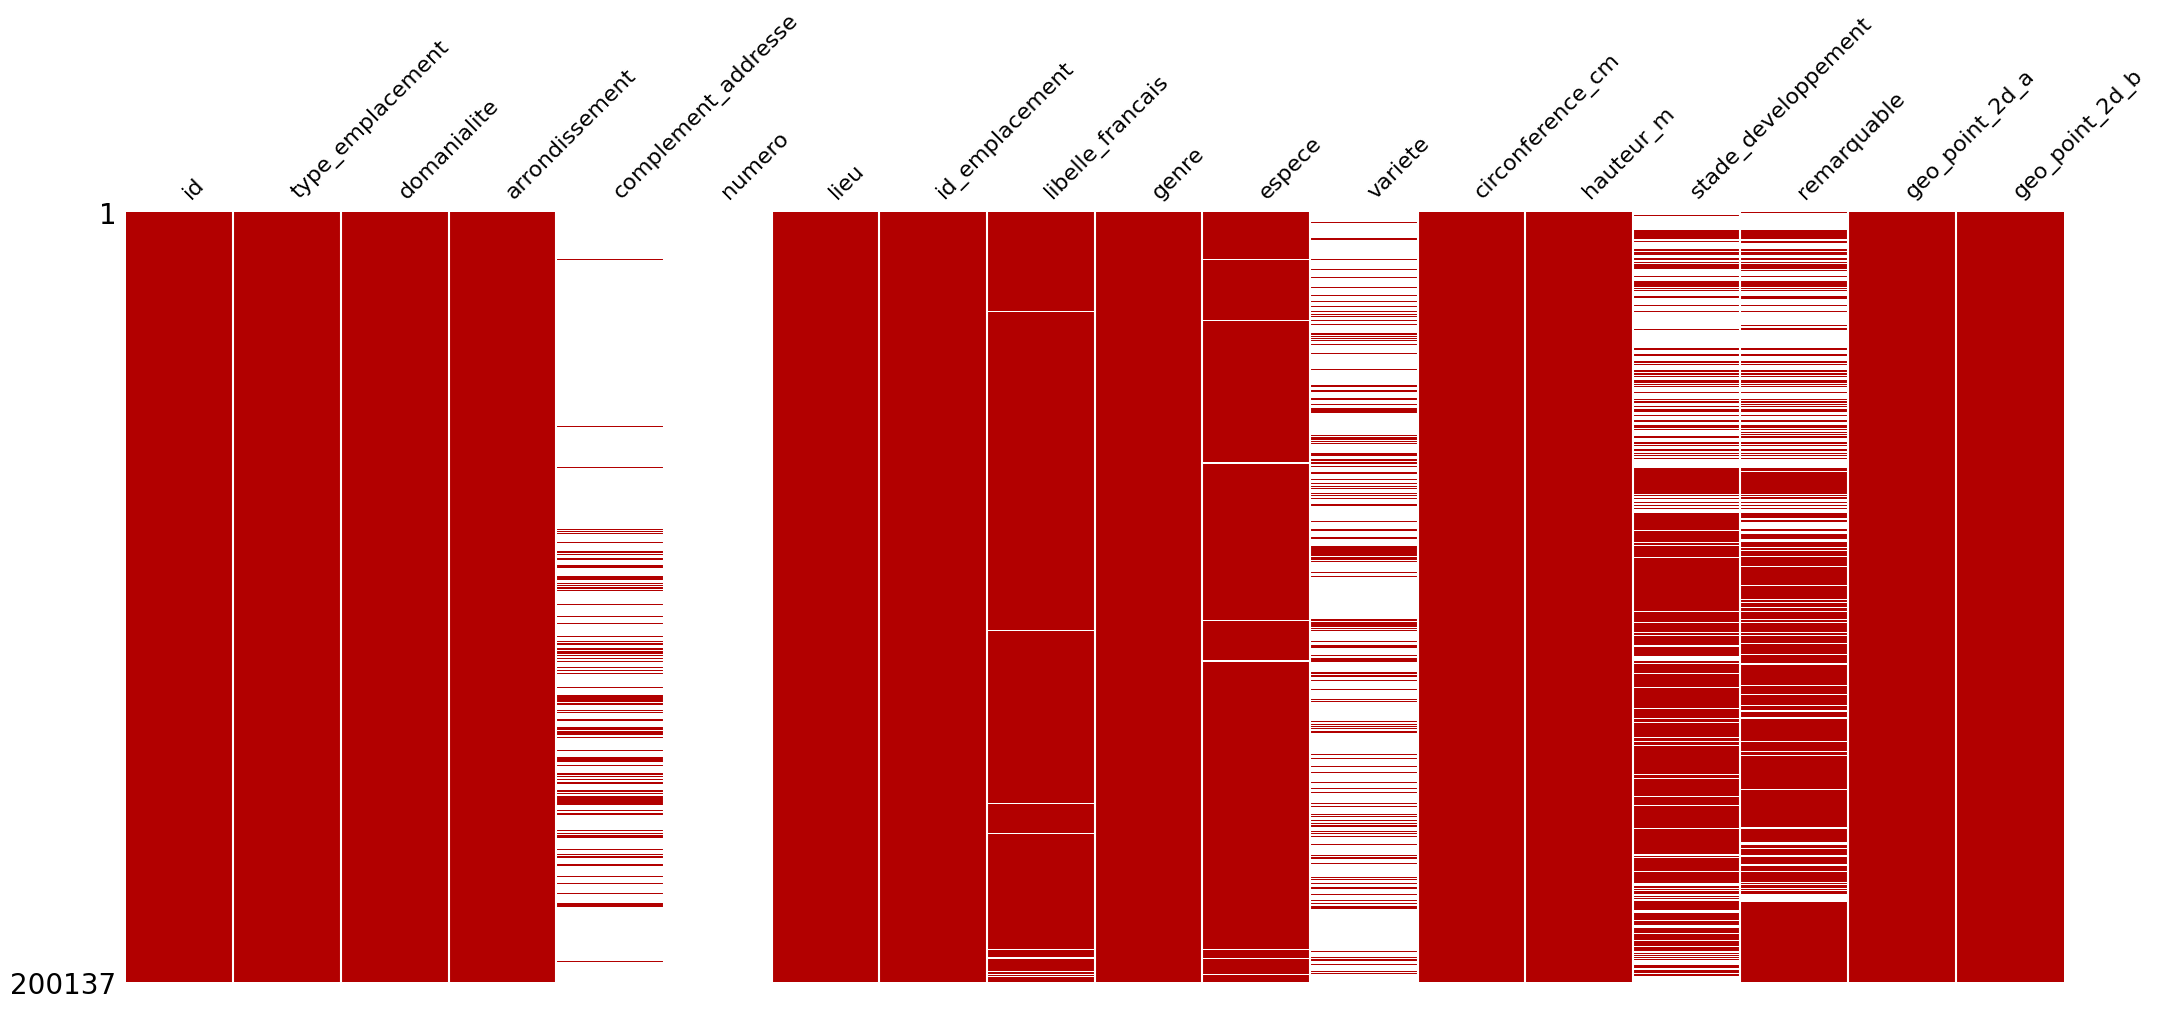

In [9]:
ms.matrix(dataBrute,color=[0.7,0.0,0.0],sparkline=False) #dataviz of missing data
plt.show()

On remarque que certaines colonnes sont vraiment très peu renseignées :

- `complement_adresse` - 85% vide. Très difficile à considérer dans l'étude
- `numero` - 100% vide. Ne pas la considérer
- `variete`- 82% vide. très difficile à considérer
- `stade_developpement`- 34% vide. Prendre garde.
- `remarquable`- 34% vide. Prendre garde.

On peut faire d'autre observations :

- `espece` - 1% vide, `libelle_francais` - 1% vide, `genre` - 16 valeurs manquantes. Intéressant car visuellement les valeurs manquantes ne semblent pas être au même endroit. Serait peut-être possible de réaliser des imputations ?
- `domanialité`- 1 valeur manquante. Individus peut-être supprimé.

## 1.4) Mesures statistiques sur les données brutes <a class="anchor" id="14"></a>

On utilise la méthode `.describe()` pour nous renseigner sur la répartition des valeurs de chaque colonne.


On affiche pour chaque colonne :
- **count** : nombre de valeurs
- **unique** : nombre de valeurs uniques
- **top** : le mode, la valeur la plus fréquente (*que pour colonnes string*)
- **freq** : la fréquence du mode (*que pour colonnes string*)
- **mean** : la moyenne, la somme de toutes les valeurs divisée par leur nombre (*que pour colonnes int et float*)
- **std** : l'écart type, la dispersion autour de la moyenne (*que pour colonnes int et float*)
- **min** : minimum (*que pour colonnes int et float*)
- **25%** : 1er quartile, 25% des valeurs sont en dessous, 75% au dessus (*que pour colonnes int et float*)
- **50%** : médiane, 50% des valeurs sont en dessous, 50% au dessus (*que pour colonnes int et float*)
- **75%** : 3ème quartile, 75% des valeurs sont en dessous, 25% au dessus (*que pour colonnes int et float*)
- **max** : maximum (*que pour colonnes int et float*)

Les **éventuels commentaires** ont été rajoutés en fin de tableau. Le nombre de valeurs n'est pas commenté (cf. valeurs manquantes, plus haut).

In [10]:
dataDescribe=dataBrute.describe(include="all")
rowComments=["","une unique valeur : Arbre","","+ d'uniques que d'arrondissements...","","","","","","","","","min et max étonnants / moy>med","min et max étonnants / moy>med","4 valeurs uniques","","",""]
dataDescribe.loc["Commentaire"]=rowComments
display(dataDescribe)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.0,200137,200136,200137,30902,0.0,200137,200137,198640,200121,198385,36777,200137.0,200137.0,132932,137039.0,200137.0,200137.0
unique,NaN,1,9,25,3795,NaN,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,NaN,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN
mean,387202.682308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208
std,545603.242357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.05122
min,99874.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,48.74229,2.210241
25%,155927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,5.0,NaN,0.0,48.835021,2.30753
50%,221078.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,8.0,NaN,0.0,48.854162,2.351095
75%,274102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,12.0,NaN,0.0,48.876447,2.386838


# PARTIE 2 - DÉMARCHE MÉTHODOLOGIQUE D'ANALYSE DE DONNÉES<a class="anchor" id="P2"></a>

## 2.1) Regardons les colonnes plus en détail<a class="anchor" id="21"></a>

### Préambule - fonction pour les Visualisations
Lorsque ce sera opportun, nous représenterons la distribution empirique des colonnes **qualitatives**. 

Dans les cas des colonnes comportants **beaucoup de modalités**, on pourra afficher la distribution seulement des modalités **les plus fréquentes**.

In [11]:
# create function for drawing of empirical distribution of a columns

def vizQuali (X,df=dataBrute, k="bar",NbMod=30) : 
    '''input
    X : string, column's name
    df : pd.dataFrame, the dataframe used, by default dataBrute
    k : string, tpye of chart, by defult bar plot
    output
    requested graph'''
    
    # size of text
    plt.rcParams.update({"font.size":12})
    
    
    # drawing the graph
    
    data=df[X].value_counts(normalize=True,ascending=True) # count occurrences and calculate frequencies
    
    if len (df[X].value_counts()) <= NbMod :
        data.plot(kind=k) # draw         
        plt.title(X+" - Distribution empirique", fontsize=14,fontweight="bold") # title
    else :
        data.tail(NbMod).plot(kind=k) # draw       
        plt.title(X+" - Distribution empirique - "+str(NbMod)+" principales modalités", fontsize=14,fontweight="bold") # title
    
    
    # set label and grid
    if k=="bar" :
        plt.ylabel("fréquence")
        plt.grid(axis="y")
    elif k=="barh" :
        plt.xlabel("fréquence")
        plt.grid(axis="x")



### Colonne `id` 

Y-a-t-il des doublons ?

In [12]:
# use .duplicated() method to which we associate .sum() to count the duplicate values
print("Il y a ",dataBrute.duplicated("id").sum()," doublon(s) en considérant la colonne id")

Il y a  0  doublon(s) en considérant la colonne id


### Colonne `type_emplacement`

Nous avons vu que les valeurs de la colonne sont toutes identiques. Ce data set est peut-être issu d'un plus grand jeu de données dont il a été extrait. 
Pour notre étude nous pouvons ne pas considérer cette colonne.
**Elle sera supprimée lors du nettoyage**.

### Colonne `domanialite`

Pour comprendre un peu mieux cette colonne, on peut visualiser les 9 modalités précédemment détectées, et se rendre compte de leur distribution :

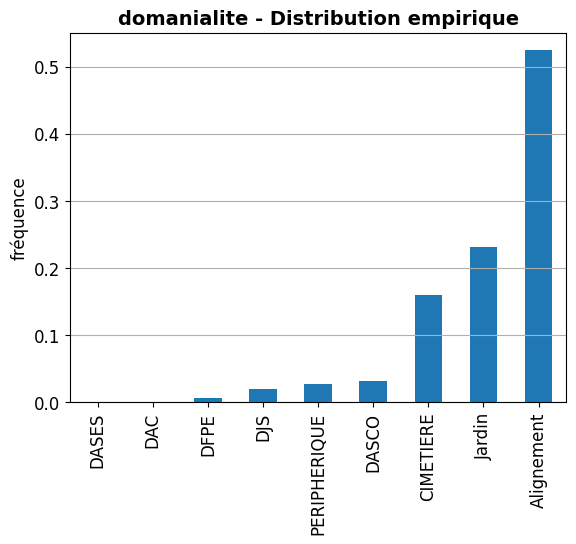

In [13]:
vizQuali("domanialite")

On avez vu qu'il manquait une valeur. Celle-ci peut clairement être supprimée. 
Pour le sport, celle-ci est-elle évidente ?

In [14]:
#let's see what tree it is
dataBrute.loc[dataBrute["domanialite"].isna(),:]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35,4,JA,0.0,48.849547,2.41419


In [15]:
#the place seems to indicate a garden, let's check
dataBrute.loc[dataBrute["lieu"].str.startswith("JARDINS D IMMEUBLES"),"domanialite"].value_counts()

Jardin    81
Name: domanialite, dtype: int64

On pourrait imputer cette valeur.

### Colonne `arrondissement`

Cette colonne avait peu (bien que trop ?) de valeurs uniques. On peut la visualiser.

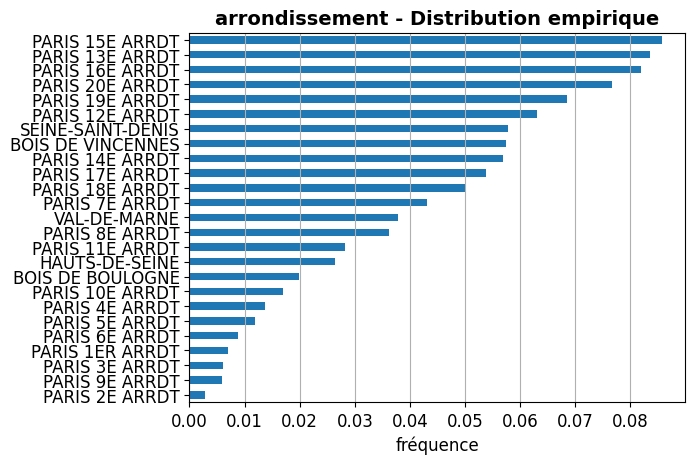

In [16]:
vizQuali("arrondissement",k="barh")

On comprend mieux pourquoi :
- il y avait plus de modalités uniques que d'arrondissements...
- cette colonne n'a pas été créée en type `int`

Après recherche, on s'apparçoit que la ville de Paris a en propriété le bois de Boulogne (rattaché au 16ème arrondissement) et la bois de Vincennes (rattaché au 12ème).

On peut néanmoins s'interroger sur les départements ...

In [17]:
#filter to keep only the trees located in the departments
display(dataBrute.loc[dataBrute["arrondissement"].isin(["SEINE-SAINT-DENIS","VAL-DE-MARNE","HAUTS-DE-SEINE"])])

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
34598,139997,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / DIV 40,D00000040021,Erable,Acer,campestre,NaN,75,5,JA,0.0,48.814509,2.368360
34599,139998,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / DIV 40,D00000040023,Erable,Acer,monspessulanum,NaN,90,7,JA,0.0,48.814360,2.367689
34600,140000,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES PLATANES D'OR...,A08200009009,Platane,Platanus,x hispanica,NaN,25,5,J,0.0,48.906793,2.401695
34602,140035,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / AVENUE DU NORD / DIV 46,A09800046001,Platane,Platanus,x hispanica,NaN,308,28,A,0.0,48.815150,2.368099
34603,140036,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / AVENUE DU NORD / DIV 19,A09800019002,Marronnier,Aesculus,hippocastanum,Baumannii',65,8,JA,0.0,48.811981,2.367481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198691,2022764,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE DU POURTOUR EST /...,A101000F7006,Tilleul,Tilia,cordata,NaN,130,10,NaN,0.0,48.767655,2.375209
198692,2022765,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE DU POURTOUR EST /...,A101000F7007,Tilleul,Tilia,cordata,NaN,130,10,NaN,0.0,48.767664,2.375115
198765,2022984,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE SAINT-OUEN NOUV / DIV 31,D00000031050,Abricotier,Prunus,armeniaca,NaN,20,5,NaN,0.0,48.910619,2.349940
198767,2023008,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE SAINT-OUEN NOUV / DIV 31,D00000031051,Prunier à fruits,Prunus,domestica,Reine Claude',20,3,NaN,0.0,48.910663,2.349954


Tous les arbres concernés semble être situés dans des cimetières. Vérifions :

In [18]:
# same filter, then we look at the "domanialite" values
dataBrute.loc[dataBrute["arrondissement"].isin(["SEINE-SAINT-DENIS","VAL-DE-MARNE","HAUTS-DE-SEINE"])]["domanialite"].value_counts()

CIMETIERE    24419
DJS             29
Name: domanialite, dtype: int64

C'est majoritairement le cas. Après vérification, Paris possède bien des cimetières extramuros, et quelques installations sportives.

### Colonne `complement_addresse`

In [19]:
dataBrute["complement_addresse"].value_counts()

SN°           557
1             552
2             547
3             498
4             464
             ... 
F 10-12         1
F 99            1
93 Flandre      1
F 97            1
40face          1
Name: complement_addresse, Length: 3795, dtype: int64

Les valeurs de cette colonne n'ont pas vraiment de format fixe. Ce qui sera difficilement exploitable. De plus, si l'on souhaite la localisation précise de chaque individus, nous avons à disposition les colonnes latitude et longitude.
**Elle sera supprimée lors du nettoyage**.

### Colonne `numero`

Comme vu précédemment, cette colonne est 100% vide.
**Elle sera supprimée lors du nettoyage**.

### Colonne `lieu`

Nous avons vu que cette colonne comporte 6921 valeurs uniques. Il ne serait pas opportun de visualiser sa distribution avec un graphique.

On peut néanmoins afficher les 10 plus fréquentes :

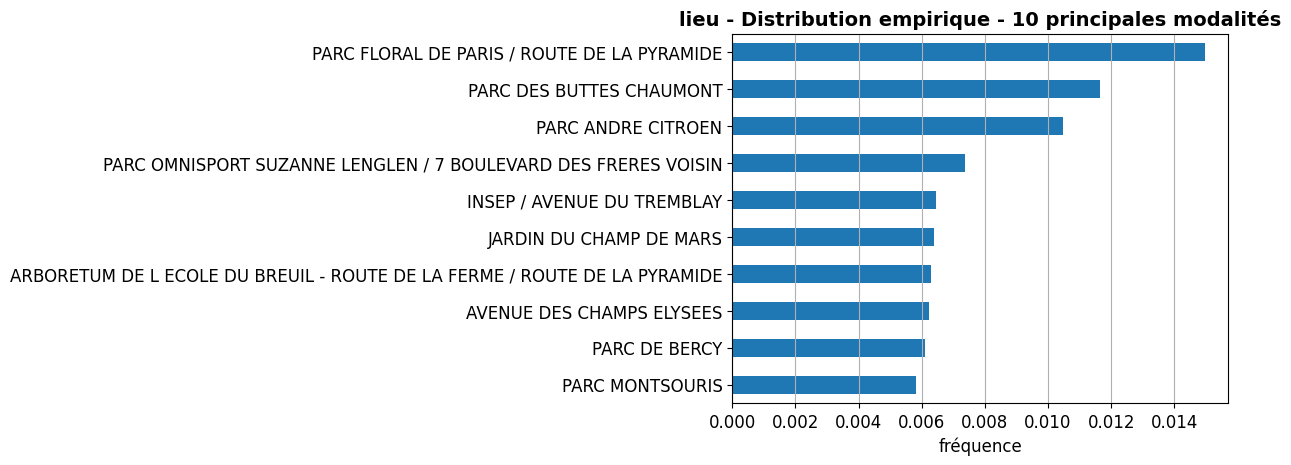

In [20]:
vizQuali("lieu",k="barh",NbMod=10)

Les valeurs de `lieu` semble indiquer, pour certaines d'entre elle :
- d'abord un lieu général
- puis un lieu plus précis (par exemple une rue), après un caractère `/`


Regardons de plus près avec la modalité `CIMETIERE ST VINCENT / DIV 5` pour voir s'il en existe d'autre commençant par `CIMETIERE ST VINCENT...`


In [21]:
modalitesLieu=dataBrute["lieu"].value_counts().index

modalitesLieu[modalitesLieu.str.startswith("CIMETIERE ST VINCENT")]

Index(['CIMETIERE ST VINCENT / AVENUE DE LA FONTAINE DU BUT / DIV 6',
       'CIMETIERE ST VINCENT / AVENUE PRINCIPALE / DIV 5',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N1 / DIV 11',
       'CIMETIERE ST VINCENT / AVENUE PRINCIPALE / DIV 11',
       'CIMETIERE ST VINCENT / AVENUE SAINT VINCENT / DIV 13',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N2 / DIV 12',
       'CIMETIERE ST VINCENT / AVENUE SAINT VINCENT / DIV 12',
       'CIMETIERE ST VINCENT / AVENUE TRANSVERSALE / DIV 9',
       'CIMETIERE ST VINCENT / AVENUE DE LA FONTAINE DU BUT / DIV 5',
       'CIMETIERE ST VINCENT / AVENUE TRANSVERSALE / DIV 13',
       'CIMETIERE ST VINCENT / AVENUE TRANSVERSALE / DIV 12',
       'CIMETIERE ST VINCENT / AVENUE TRANSVERSALE / DIV 10',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N2 / DIV 9',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N1 / DIV 8',
       'CIMETIERE ST VINCENT / AVENUE PRINCIPALE / DIV 8',
       'CIMETIERE ST VINCENT / AVENUE LATERALE N2 / DIV 13',
      

On pourrait séparer cette colonne en deux pour avoir les deux informations à dispositon. la première partie est notamment particulièrement intéressante, car il permet de regrouper les arbres par secteur, un peu comme avec la colonne arrondissment.

### Colonne `id_emplacement`

Nous avons vu que cette colonne contient différents formats. Pour se rendre compte de l'ampleur du problème, on peut regarder la taille des valeurs :

In [22]:
#look at the values' size
dataBrute["id_emplacement"].str.len().value_counts()


6     92166
12    31928
7     27354
8     18300
2     10920
5      7187
3      5241
9      3802
1      2894
4       316
10       21
15        8
Name: id_emplacement, dtype: int64

Les valeurs de `id_emplacement` ont des tailles vraiment différentes d'un individus à l'autre. Le formatage n'est donc pas uniforme ou exploitable. **Elle sera supprimée lors du nettoyage**.

### Colonnes `libelle_francais`, `genre`, `espece` et `variete`

Ces colonnes ont toute pour but de caractériser un arbre selon son espèce au sens large.

Nous avons vu qu'elles avaient entre 100 et 600 modalités. 

**Nous avions remarqué que les valeurs manquantes de ces colonnes n'étaient pas forcément sur les mêmes lignes. Nous pourrons nous en servir pour le nettoyage.**

Voyons ce qui en ressort avec des diagrammes en secteurs :

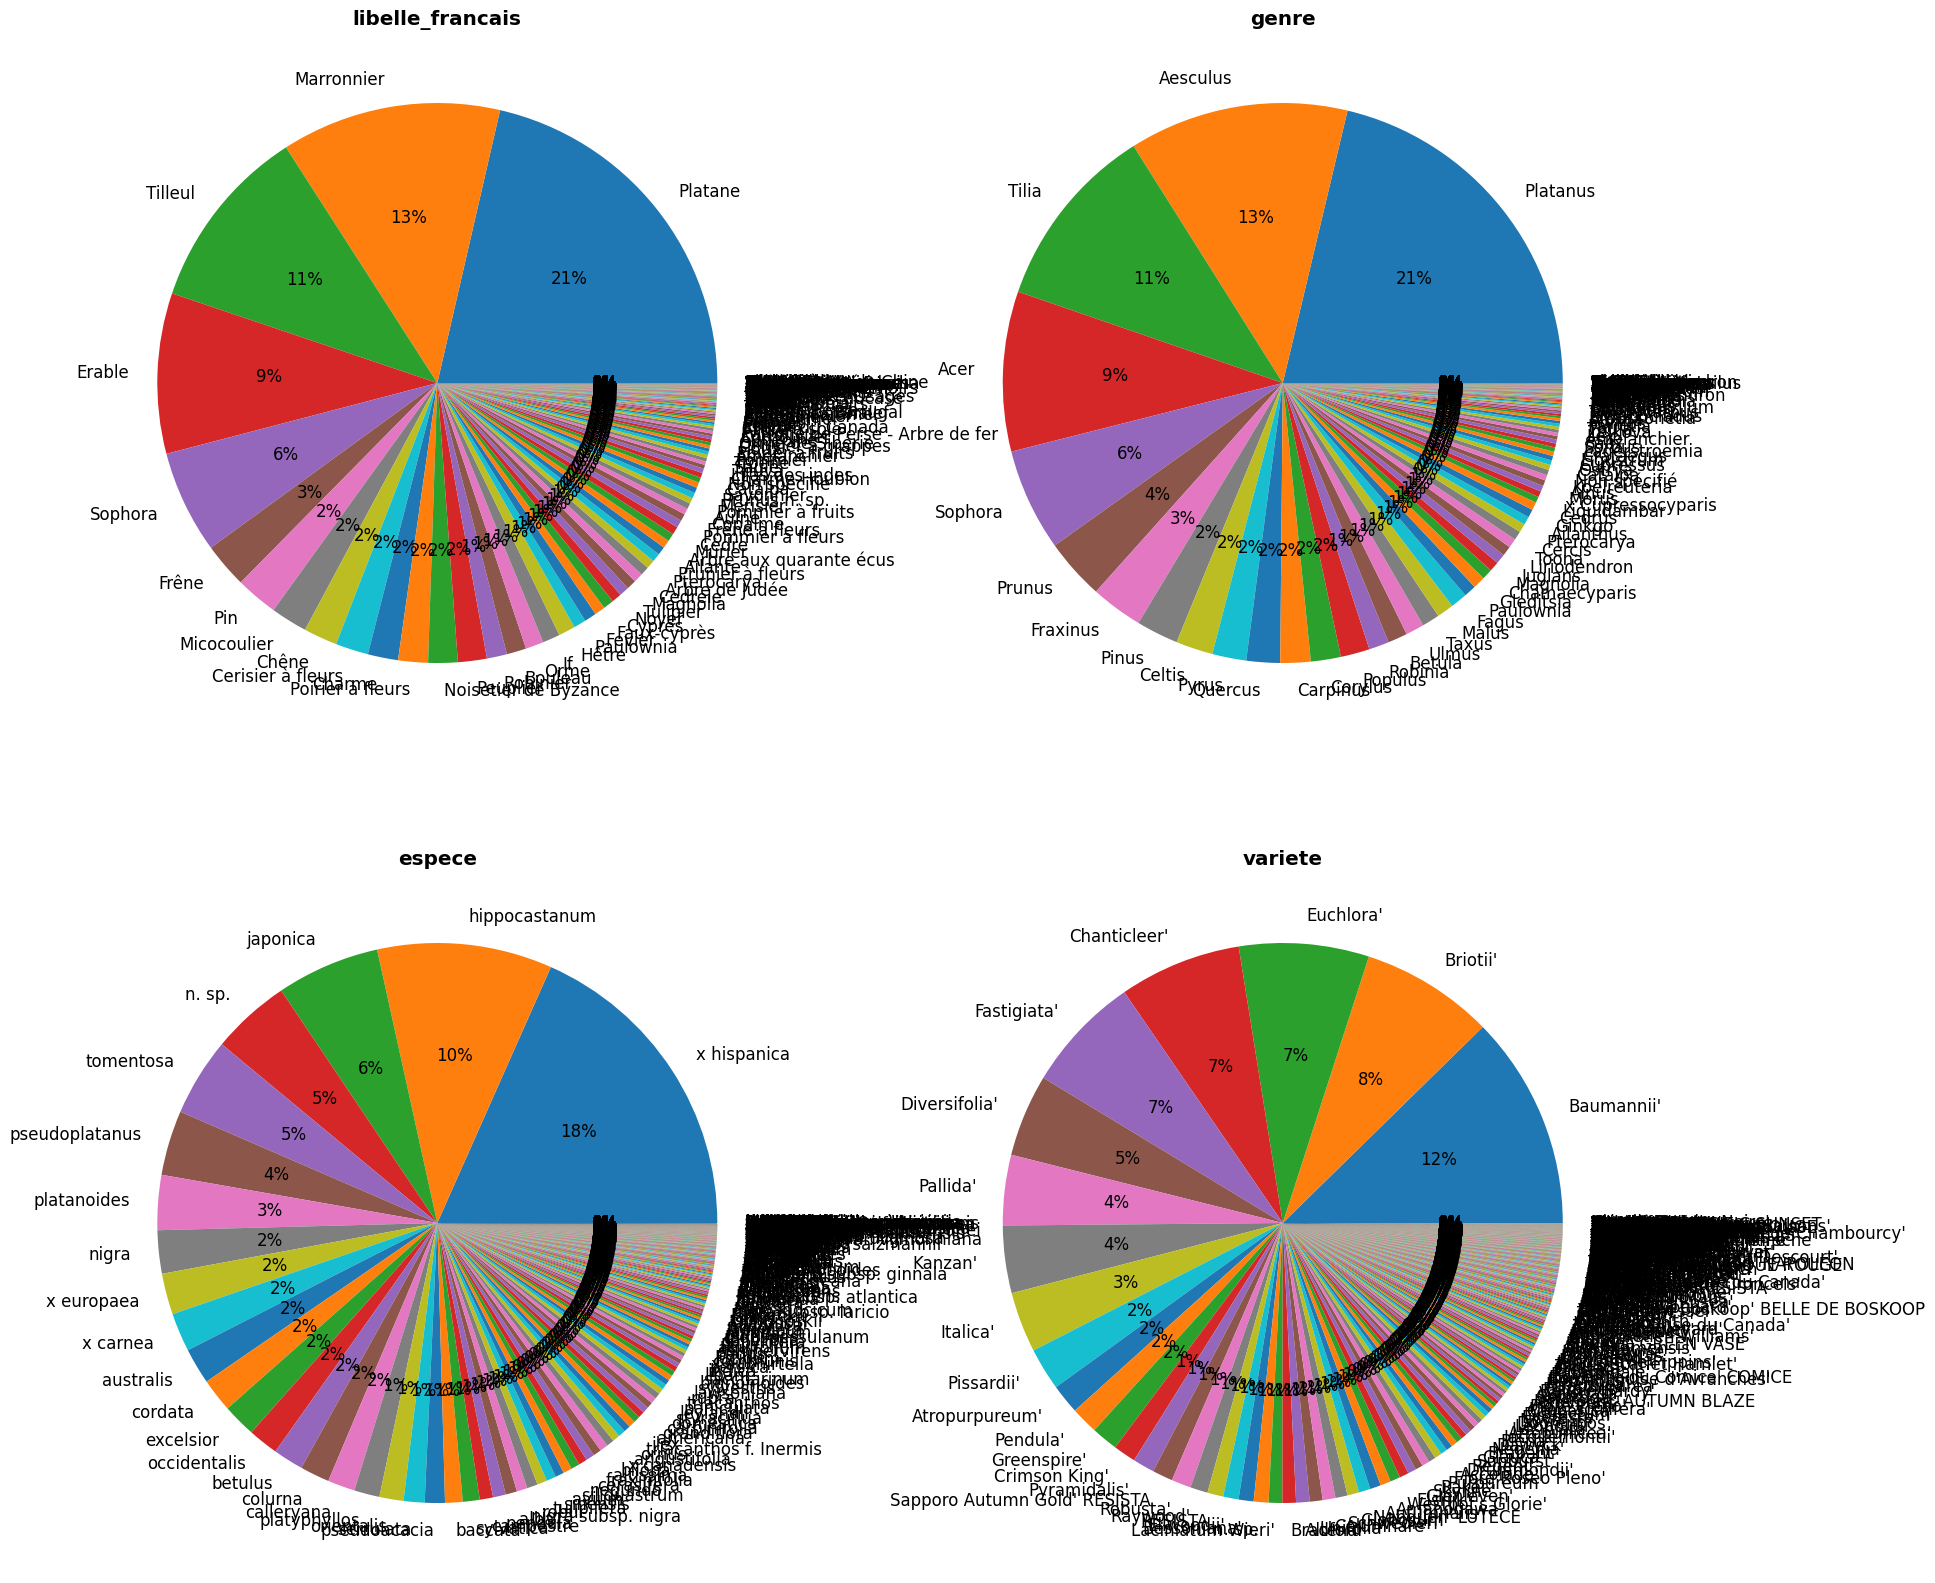

In [23]:
listColEspece=["libelle_francais", "genre", "espece", "variete"]
plt.figure(figsize=(20,20))
for X in listColEspece :
    plt.subplot(2,2,listColEspece.index(X)+1)
    plt.pie(x=dataBrute[X].value_counts(normalize=True),labels=dataBrute[X].value_counts(normalize=True).index,autopct="%.0f%%")
    plt.title(X,fontweight="bold")
plt.show()

Nous remarquons pluseurs choses.

Certaines valeurs ne sont vraiment que très peu représentées. Dans l'optique d'étudier d'autres données par type d'arbre de manière plus lisible (par exemple en fonction de l'age ou de la position), il pourra être intéressant **regrouper les valeurs les moins présentes** au sein d'une **catégorie `Autre` lors du nettoyage**. 

On remarque aussi une valeur `n. sp.` dans espece. Cela correspond à une valeur non spécifiée, et donc revient à une **valeur manquante**. **A traiter lors du nettoyage**. Après recherche il en va de même pour les autres colonnes (`non spécifié`)

### Colonnes `circonference_cm` et `hauteur_m`

Comme vu précédemment ces colonnes ont des valeurs qui semblent aberrantes :

In [24]:
#filter the dataDescribe dataframe on circonference_cm and hauteur_m columns
#and on the statistics we need to check
dataDescribe.loc[["mean","std", "min", "max","25%",'50%',"75%"],["circonference_cm","hauteur_m"]]

,circonference_cm,hauteur_m
mean,83.380479,13.110509
std,673.190213,1971.217387
min,0.0,0.0
max,250255.0,881818.0
25%,30.0,5.0
50%,70.0,8.0
75%,115.0,12.0


Ces valeurs aberrantes perturbent la bonne compréhension de nos données :
- la moyenne et donc l'écart-type y sont très sensibles. On ne peut donc pas faire confiance aux valeurs ci-dessus
- si l'on souhaite prioriser l'entretien des arbres en fonction de leur taille (par exemple si l'on souhaite faire une campagne avec des véhicules spécifiques sur les plus hauts sujets), ces données ne nous permettent pas de la faire correctement


Pour mieux visualiser le problème, nous pouvons représenter la répartition de l'ensemble des valeurs prises par `circonference_cm` et `hauteur_m` sous la forme d'une "**boite à moustaches**".

Expliquons de quoi il s'agit. Ce type de graphique permet de représenter la position de :
- 25% ou **Q1** : 1er quartile, 25% des valeurs sont en dessous, 75% au dessus
- 50% ou **Med** : médiane, 50% des valeurs sont en dessous, 50% au dessus
- 75% ou **Q3** : 3ème quartile, 75% des valeurs sont en dessous, 25% au dessus

l'intervalle entre Q1 et Q3 contient 50% des valeurs prises. La taille de cet intervalle s'appelle l'**écart interquartile IQR**. Il prend la forme d'un rectangle sur la "boite à moustaches".

C'est ce même IQR qui peut nous permettre de définir un seuil au delà duquel les valeurs seront considérées comme aberrantes :
- **on retire les valeurs inférieures à 1,5 x IQR**
- **on retire les valeurs supérieures à 1,5 x IQR**

Cette manière de définir les valeurs aberrantes est appelée le **Critère de Tukey**.

Graphiquement, c'est ainsi qu'on obtient les "moustaches" entre le rectangle et les nouveaux maximum (B sur l'image ci-dessous) et minimum (A sur l'image ci-dessous).

les valeurs aberrantes (outliers sur l'image) déterminées sont représentées par des points.

![](1508878760102_Boxplot.jpeg)

Voyons ce que cela donne avec nos colonnes `circonference_cm` et `hauteur_m` :

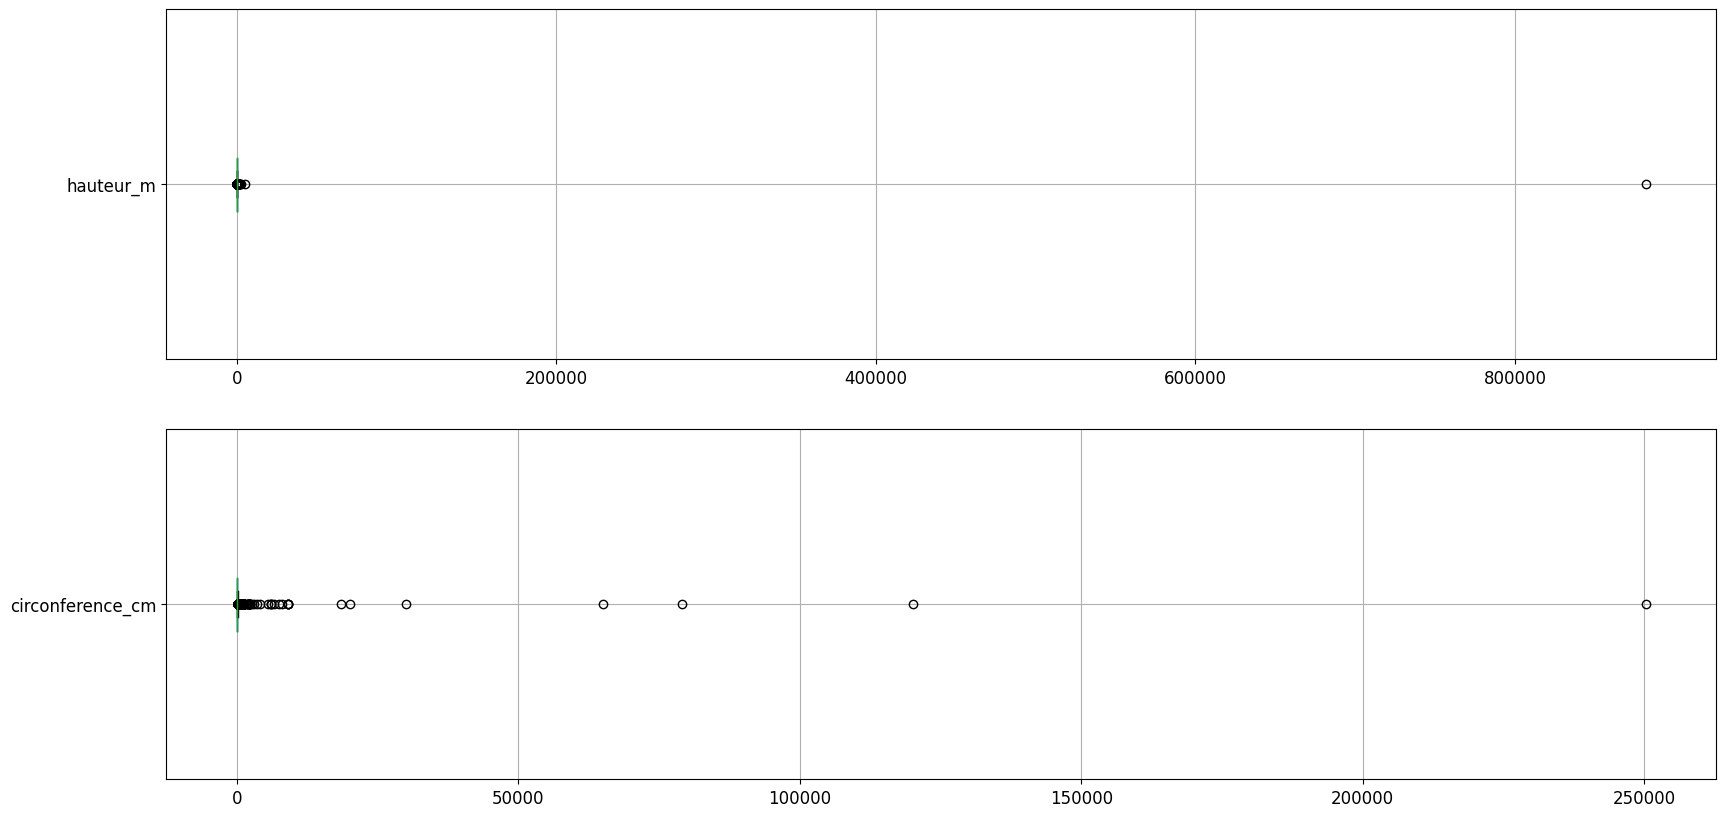

In [25]:
#dipslay the 2 boxplots

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
dataBrute.boxplot(column=["hauteur_m"],vert=False)

plt.subplot(2,1,2)
dataBrute.boxplot(column=["circonference_cm"],vert=False)

plt.show()

Ces valeurs aberrantes perturbent la bonne compréhension de nos données :
- la moyenne et donc l'écart-type y sont très sensibles. On ne peut donc pas faire confiance aux valeurs ci-dessus
- si l'on souhaite prioriser l'entretien des arbres en fonction de leur taille (par exemple si l'on souhaite faire une campagne avec des véhicules spécifiques sur les plus hauts sujets), ces données ne nous permettent pas de la faire correctement

Il faudra donc **traiter ces valeurs aberrantes lors du nettoyage des données**.

Les valeurs aberrantes hautes perturbent l'affichage des boites à moustaches. Il peut être intéressant de "zoomer" un peu pour mieux se rendre compte de la répartition des valeurs proche de 0 :

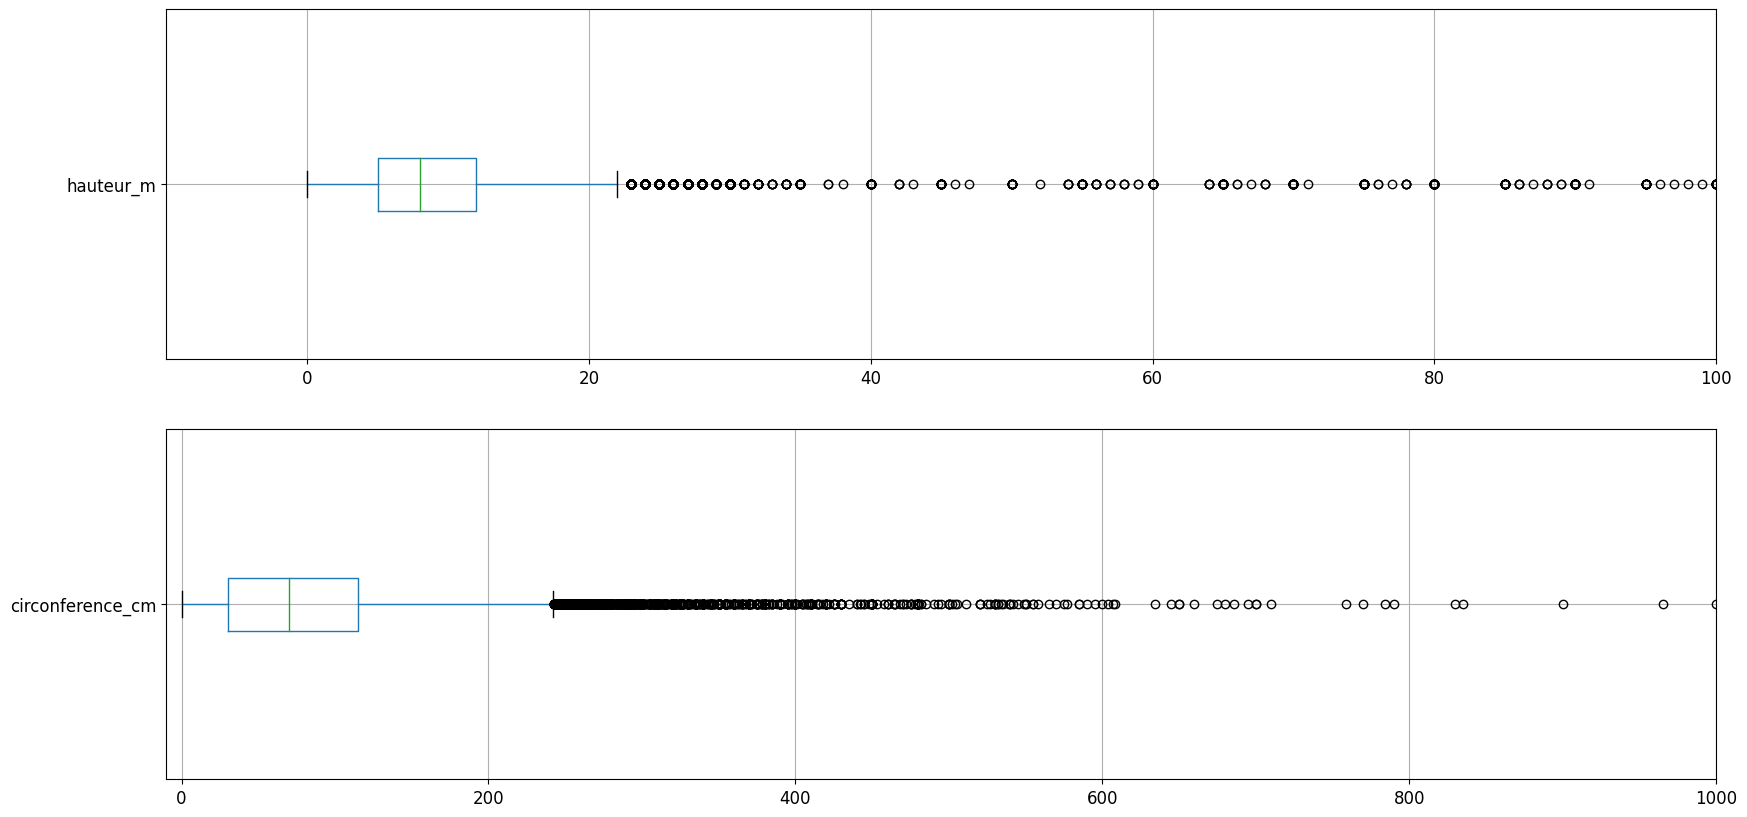

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
dataBrute.boxplot(column=["hauteur_m"],vert=False)
plt.xlim(-10,100)

plt.subplot(2,1,2)
dataBrute.boxplot(column=["circonference_cm"],vert=False)
plt.xlim(-10,1000)

plt.show()

La valeur 0 est la limite basse pour nos deux colonnes. On peut s'intéresser à l'ampleur du phénomène :

In [27]:
#how many trees have zero for "hauteur_m" or "circonference_cm" ?
dataBrute.loc[(dataBrute["hauteur_m"]==0)  | (dataBrute["circonference_cm"]==0),"id"].value_counts().sum()

39585

In [28]:
#how many trees have zero for "hauteur_m" and "circonference_cm" ?
dataBrute.loc[(dataBrute["hauteur_m"]==0)  & (dataBrute["circonference_cm"]==0),"id"].value_counts().sum()

25501

In [29]:
#how many trees just for "hauteur_m" ?
dataBrute.loc[(dataBrute["hauteur_m"]==0),"id"].value_counts().sum()

39219

In [30]:
#how many trees just for "circonference_cm" ?
dataBrute.loc[(dataBrute["circonference_cm"]==0),"id"].value_counts().sum()

25867

Dans les deux cas zéro est une valeur impossible. Il s'agit donc d'une valeur aberrante.
Cela peut s'expliquer : pour rappel le nombre de valeurs manquantes pour ces deux colonnes représentait 0%.

**On peut donc supposer que les valeurs 0 correspondent à une abscence de donnée (par exemple un arbre non mesuré).**

Mais dans ce cas un autre problème persiste : Il y a beaucoup plus d'arbres pour lesquels la hauteur est à 0. **Pourquoi prendre le temps de mesurer la circonférence d'un sujet sans la hauteur ?**

Regardons cela de plus près :

In [31]:
#how many trees  with "hauteur_m" = 0 and "circonference_cm" > 0 ?
dataBrute.loc[(dataBrute["hauteur_m"]==0)  & (dataBrute["circonference_cm"]>0),"id"].value_counts().sum()

13718

In [32]:
#how many trees  with "hauteur_m" > 0 and "circonference_cm" = 0 ?
dataBrute.loc[(dataBrute["hauteur_m"]>0)  & (dataBrute["circonference_cm"]==0),"id"].value_counts().sum()

366

Il y a donc énormément de cas où la hauteur est à 0 tandis que la circonférence existe. Alors qu'il y a seulement 366 cas où l'on connait la hauteur sans connaître la circonférence.

On peut supposer qu'il s'agit ici non pas d'une abscence de mesure, mais d'un problème d'arrondi. En effet la colonne "hauteur_m" ne comporte que des valeurs entières. **On peut imaginer que les arbres mesurant entre 0 et 0.5 m auront été arrondi à 0 au moment du passage en valeurs entières...**

**Partant de ces observations, et dans le but de traiter les valeurs aberrantes de manière assez spécifiques, nous allons :**
- **convertir la hauteur des arbres en cm**
- traiter les valeurs à 0 :
    - si la **circonférence est à 0**, la remplacer par une **valeur manquante**
    - si la **hauteur est à 0** :
        - si la *circonférence est à 0*, remplacer la hauteur par une **valeur manquante**
        - si la *circonférence est supérieure à 0*, laisser la hauteur **à 0**
- puis **dans un second temps traiter les valeurs hautes**



### Colonne `stade_developpement`


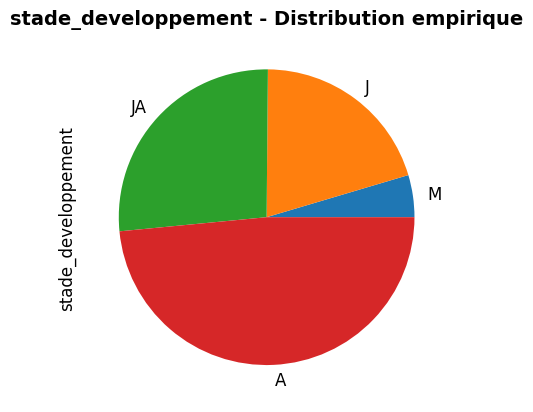

In [33]:
vizQuali(X="stade_developpement",k="pie")

Afin de faciliter la **lisibilité**, nous **renommerons** les catégories d'âge lors du **nettoyage**.

## 2.2) Nettoyage<a class="anchor" id="22"></a>

In [34]:
# create a dataframe for cleaning
dataPropre=dataBrute.copy()

### Suppression `type_emplacement` et `numero`

In [35]:
# delete unnecessary columns "type_emplacement" (1 unique value), "numero" (not filled in at all)
dataPropre=dataPropre.drop(columns=["type_emplacement","numero"])

### Suppression `complement_addresse` et `id_emplacement`

In [36]:
# delete columns "complement_addresse" and "id_emplacement" 
#(too many formatting errors)
dataPropre=dataPropre.drop(columns=["complement_addresse","id_emplacement"])

### Imputation valeur manquante `domanialité`

In [37]:
# missing value is imputed on domanialité
dataPropre.loc[dataPropre["domanialite"].isna(),"domanialite"]="Jardin"

### Séparation `lieu` en deux : `lieuMacro` et `lieuMicro`

In [38]:
#split column "lieu" in two
dataPropre["lieuMacro"]=dataPropre["lieu"].str.split("/",n=1,expand=True)[0] #on crée une colonne pour la 1ère partie
dataPropre["lieuMicro"]=dataPropre["lieu"].str.split("/",n=1,expand=True)[1] #idem pour la 2ème
dataPropre.loc[dataPropre["lieuMicro"].astype(str)=="None","lieuMicro"]=np.nan #None passés en NaN

dataPropre[["lieuMacro","lieu"]].describe()

,lieuMacro,lieu
count,200137,200137
unique,3531,6921
top,CIMETIERE DE PANTIN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE
freq,9135,2995


On voit que le **mode** de `lieu` ne reflétait pas la zone la plus arborée.
On peut comparer les 2 distributions (sur les modalités les plus fréquentes) de `lieu` et `lieuMacro` :

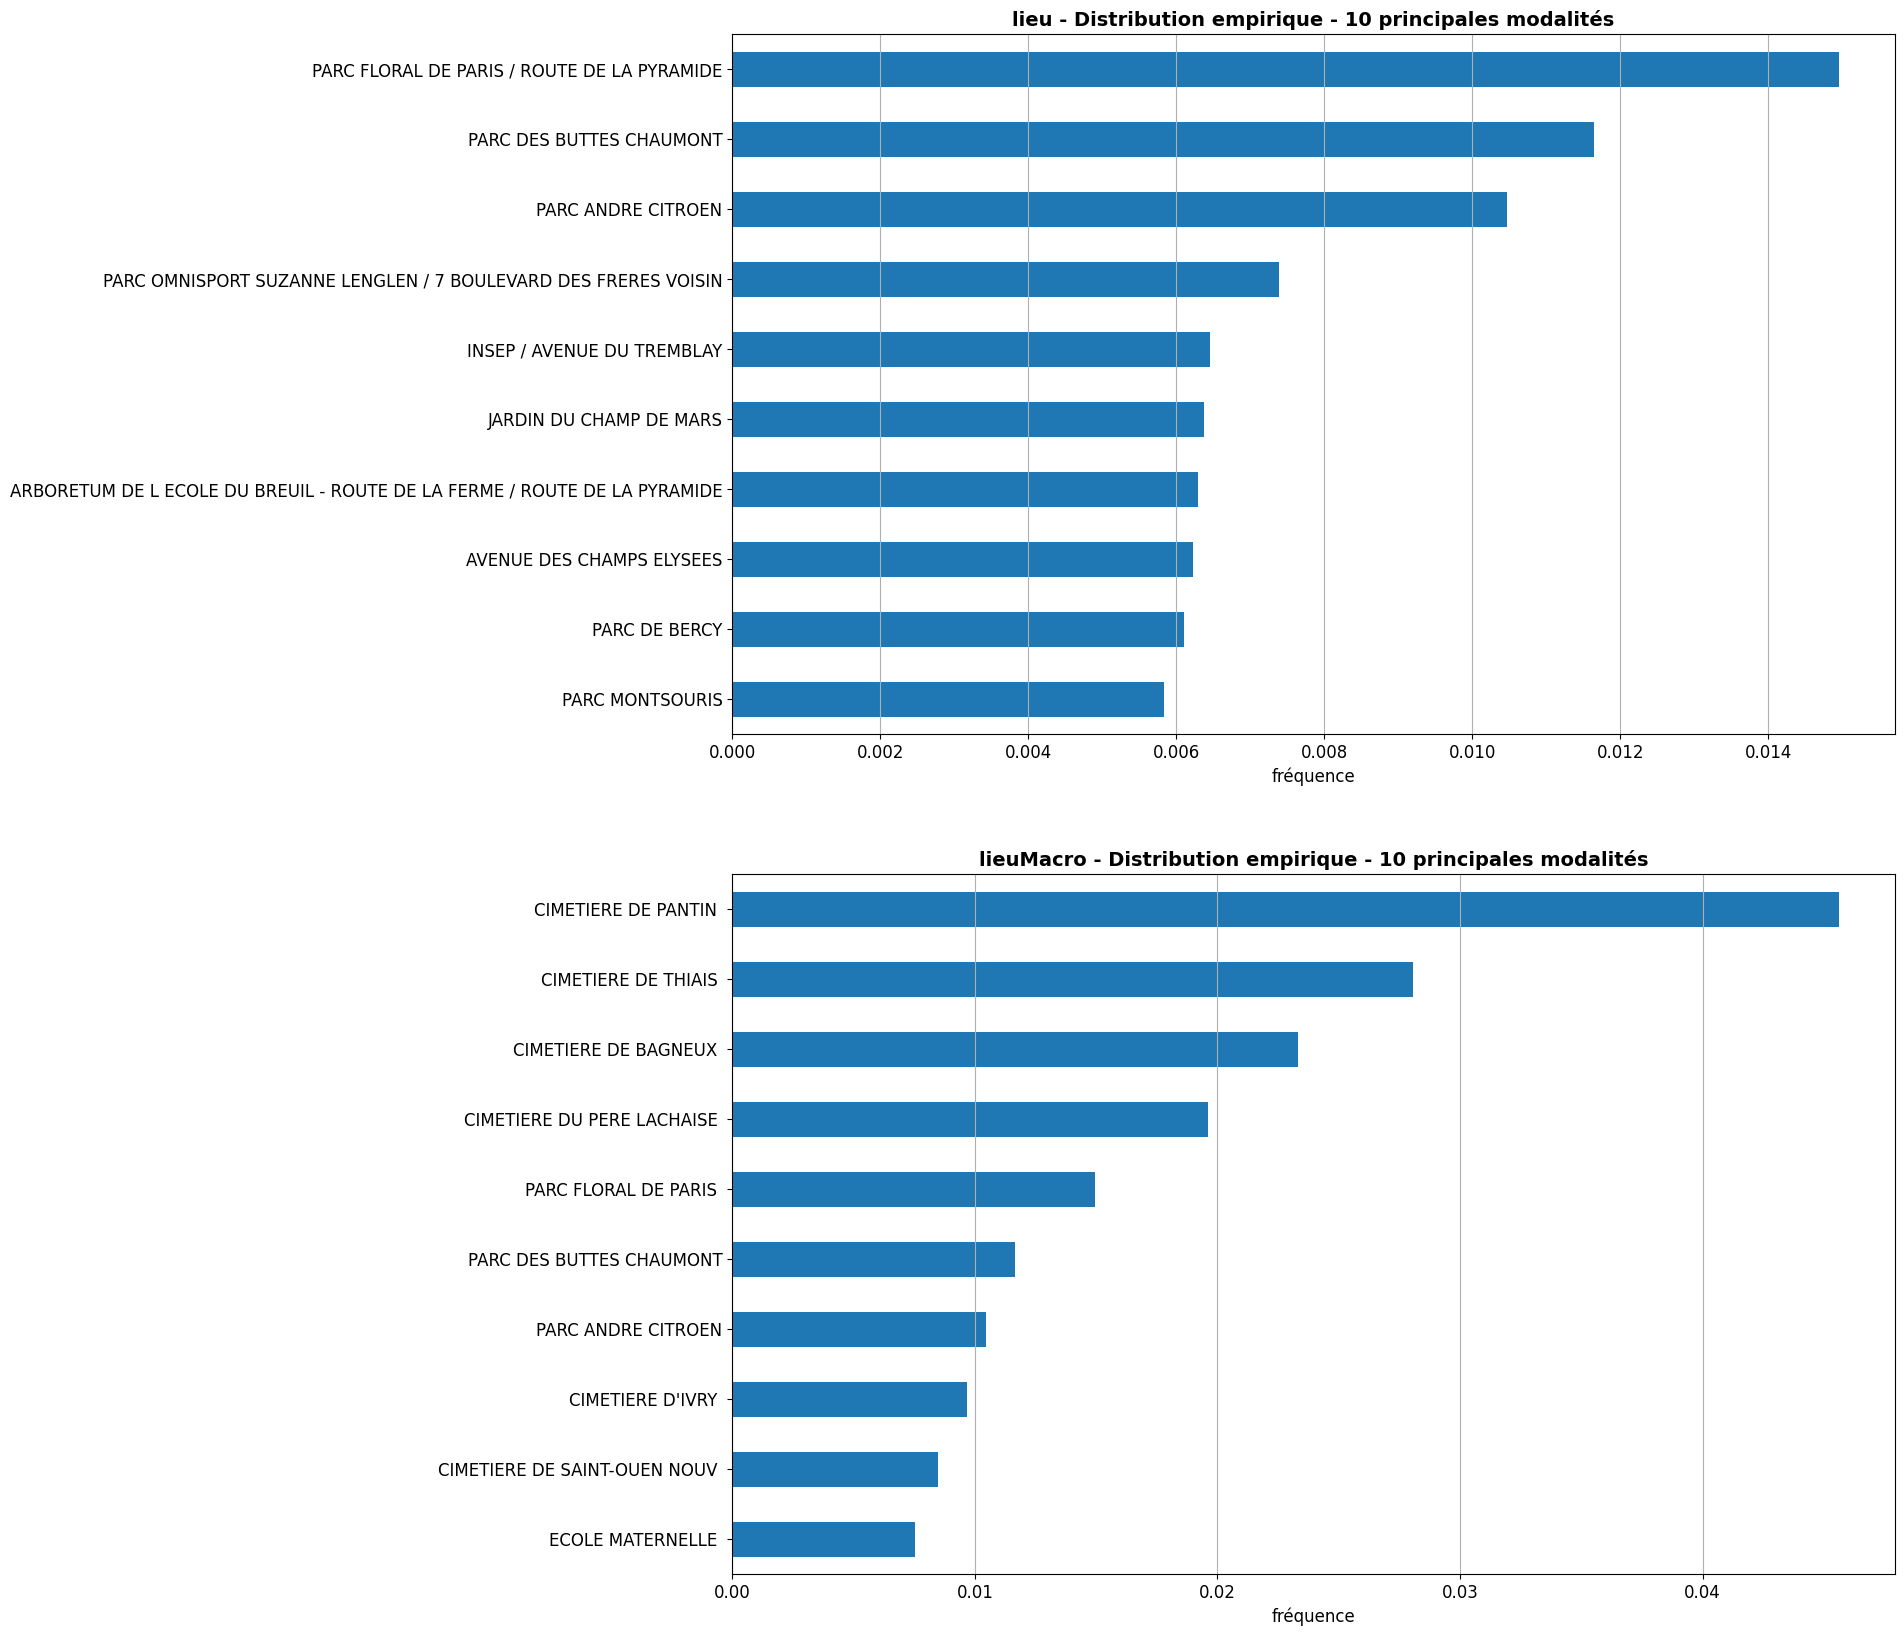

In [39]:
plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
vizQuali("lieu",df=dataPropre,k="barh",NbMod=10)
plt.subplot(2,1,2)
vizQuali("lieuMacro",df=dataPropre,k="barh",NbMod=10)

Cette nouvelle colonne pourrait servir à organiser les tournées par secteurs géographique.

Imaginons par exemple que la mairie du 13ème arrondissement souhaite planifier les interventions de ses agents. Elle pourrait répartir ces opérations par grandes zones ou rues. Les effectifs en arbres de ces zones permettraient de dimensionner précisément chaque intervention en temps et en équipes, et même de programmer la communication et les arrêtés de voirie.

In [40]:

dataPropre.groupby(["arrondissement","lieuMacro"]).count().loc["PARIS 13E ARRDT"].sort_values('id',ascending=False)["id"].head(20)

lieuMacro
BOULEVARD AUGUSTE BLANQUI             805
RUE DE TOLBIAC                        714
BOULEVARD DE L HOPITAL                562
BOULEVARD ARAGO                       481
CENTRE SPORTIF GEORGES CARPENTIER     423
AVENUE DE CHOISY                      413
PARC KELLERMANN                       400
AVENUE D ITALIE                       394
SQUARE RENE LE GALL                   362
BOULEVARD VINCENT AURIOL              353
SQUARE DE CHOISY                      342
BOULEVARD KELLERMANN                  295
BOULEVARD MASSENA                     295
AVENUE D IVRY                         277
RUE BOBILLOT                          271
AVENUE DES GOBELINS                   260
ECOLE MATERNELLE                      243
AVENUE DE FRANCE                      213
STADE CHARLETTY                       212
QUAI D AUSTERLITZ                     174
Name: id, dtype: int64

### Traitement des valeurs aberrantes de `circonference_cm` et `hauteur_m` - les 0

#### Hauteur en cm

In [41]:
#create "hauteur_cm"
dataPropre["hauteur_cm"]=dataPropre["hauteur_m"]*100

#drop "hauteur_m"
dataPropre=dataPropre.drop(columns=["hauteur_m"])

#### Traiter les valeurs à 0
   - si la **circonférence est à 0**, la remplacer par une **valeur manquante**
   - si la **hauteur est à 0** :
       - si la *circonférence est à 0*, remplacer la hauteur par une **valeur manquante**
       - si la *circonférence est supérieure à 0*, laisser la hauteur **à 0**

In [42]:
#for hauteur_cm = 0 AND circonference_cm = 0, set value to numpy NaN
dataPropre.loc[(dataPropre.hauteur_cm ==0)&(dataPropre.circonference_cm==0),"hauteur_cm"]=np.NaN
#for circonference_cm = 0, set value to numpy NaN
dataPropre.loc[dataPropre.circonference_cm==0,"circonference_cm"]=np.NaN

Regardons de nouveau ce que cela donne pour les boites à moustaches :

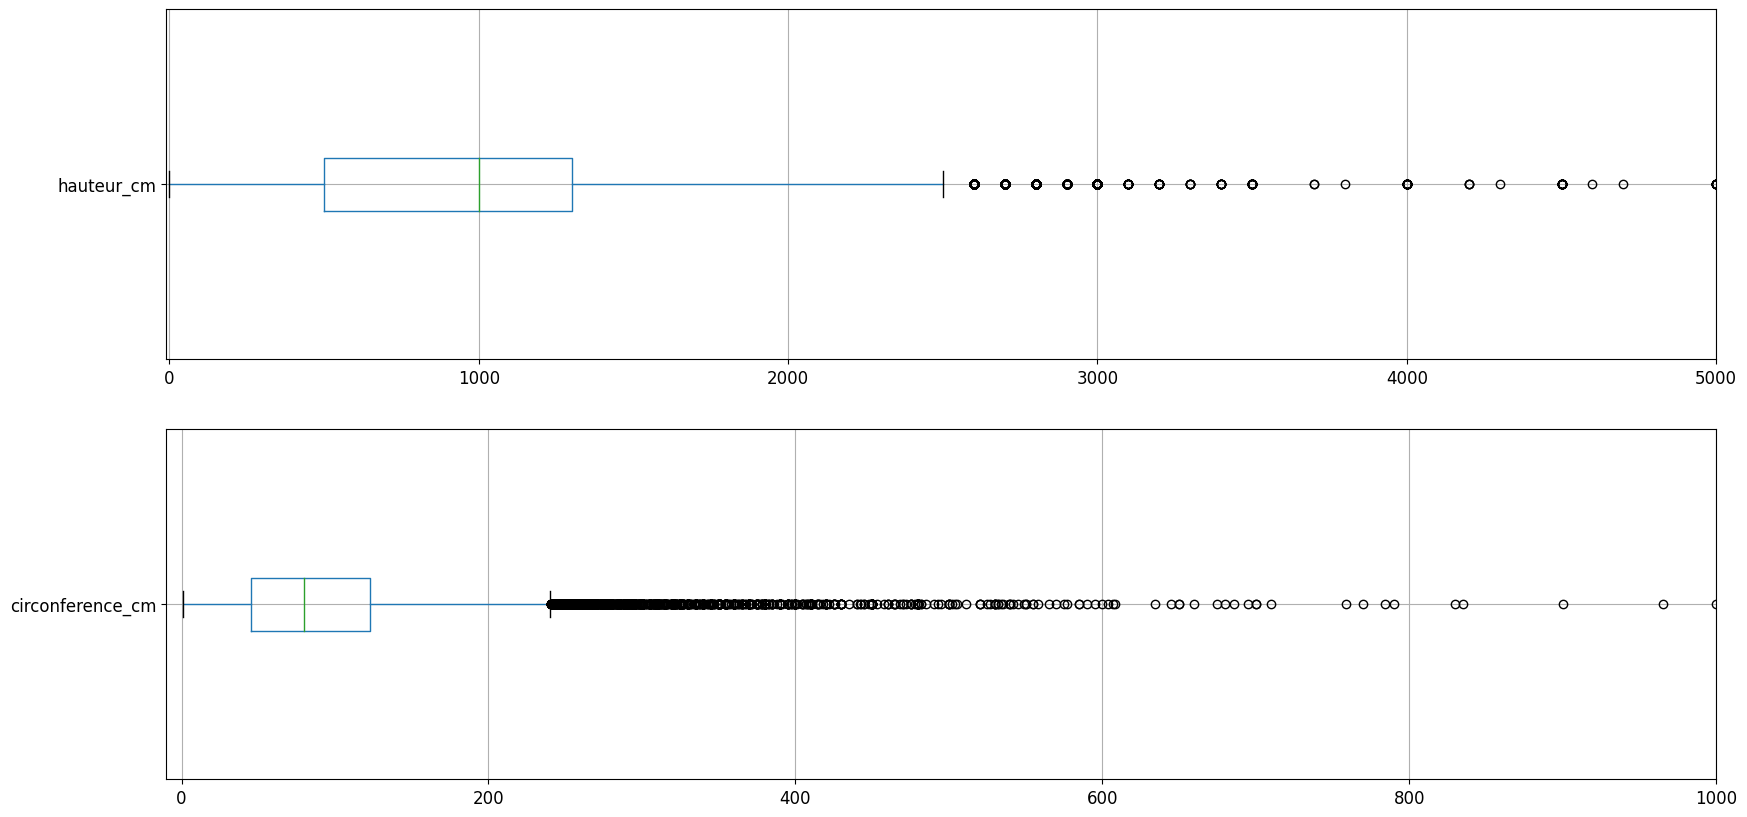

In [43]:
#again, boxplots for hauteur_cm and circonference_cm
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
dataPropre.boxplot(column=["hauteur_cm"],vert=False)
plt.xlim(-10,5000)
plt.subplot(2,1,2)
dataPropre.boxplot(column=["circonference_cm"],vert=False)
plt.xlim(-10,1000)
plt.show()

### Traitement des valeurs aberrantes de `circonference_cm` et `hauteur_m` - valeurs hautes

#### Critère de Tukey
Déterminons les valeurs maximales selon le critère de Tukey (i.e. celles représentées sur les boites à moustaches précédentes) : 

In [44]:
quartiles = dataPropre[["hauteur_cm","circonference_cm"]].quantile([0.25,0.75]) #determine Q1 and Q3
IQR = quartiles.loc[0.75]-quartiles.loc[0.25] # IQR for both columns
limitMaxTukey = quartiles.loc[0.75]+1.5*IQR

limitMaxTukey

hauteur_cm          2500.0
circonference_cm     240.0
dtype: float64

*Selon le critère de Tukey*, les valeurs aberrantes sont celles dépassant **25 mètres de hauteur** et **2 mètres 40 de circonférence.**

On peut néanmoins s'interroger sur ces bornes hautes en les confrontant avec la réalité.

#### Arbre le plus haut et arbre le plus gros de Paris ?
Après un peu de recherche : [https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris](https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris) il s'avère que :
- l'arbre le grand de Paris mesure 35 mètres
- l'arbre le plus gros a une circonférence de 7 mètres

Nous allons considérer ces valeurs comme valeurs maximales pour notre étude, car basées sur l'observation.

In [45]:
# set variables for new max :
hauteurMax=3500
circonferenceMax=7000

#### Traiter les valeurs aberrantes

Nous allons remplacer les valeurs supérieures par des valeurs manquantes :

In [46]:
dataPropre.loc[dataPropre["hauteur_cm"]>hauteurMax,"hauteur_cm"]=np.NaN #set values above hauteurMax to NaN
dataPropre.loc[dataPropre["circonference_cm"]>circonferenceMax,"circonference_cm"]=np.NaN #set values above circonferenceMax to NaN

### Traitement des valeurs `libelle_francais`, `genre`, `espece` et `variete`

#### Suppression colonne `variete`

Nous avons vu que cette colonne était à 82% vide. Nous décidons de ne pas la considérer.

In [47]:
# delete column "variete" 
dataPropre=dataPropre.drop(columns="variete")

#### Transformer les valeurs `Non spécifié` en valeurs manquantes

Nous avons vu que le taux de remplissage des colonnes `libelle_francais` , `genre` et `espece` était biaisé par des valeurs `non spécifié`. Remplassons les par des valeurs manquantes :

In [48]:
listColEspece=['libelle_francais', 'genre', 'espece']
listNS=["n. sp.","Non spécifié"]

for X in listColEspece :
    for value in listNS :
        dataPropre.loc[dataPropre[X]==value,X]=np.NaN

#### Imputation de valeurs de la colonne `libelle_francais` grâce aux colonnes `genre` et `espece`

In [49]:
dataPropre["libelle_francais_GUESS"]=dataPropre["libelle_francais"] #copy the column

dataLibelleNaN=dataPropre.loc[dataPropre["libelle_francais"].isna(), ["libelle_francais","genre","espece"]] #"genre" and "espece" where "libelle_francais" values are NaN

for g in dataLibelleNaN["genre"].value_counts().index : #iterate on unique "genre" values
    ug=dataPropre.loc[dataPropre["genre"]==g,"libelle_francais"].value_counts().index #unique values in libelle_francais for this g
    if len(ug)==1 : #if there is only one match
        dataLibelleNaN.loc[dataLibelleNaN["genre"]==g,"libelle_francais"]=ug[0] #then, where "genre" is g, "libelle_francais_CORRECT" get that match

#same with "espece"        
for e in dataLibelleNaN["espece"].value_counts().index :
    ue=dataPropre.loc[dataPropre["espece"]==e,"libelle_francais"].value_counts().index 
    if len(ue)==1 :
        dataLibelleNaN.loc[dataLibelleNaN["espece"]==e,"libelle_francais"]=ue[0]

#set the NaN values of "libelle_francais" with the determined values
dataPropre.loc[dataPropre["libelle_francais"].isna(), "libelle_francais_GUESS"]=dataLibelleNaN["libelle_francais"]

print("AVANT il y avait",len(dataLibelleNaN),"valeurs manquantes dans `libelle_francais`.")
print("APRES correction il en a",len(dataPropre.loc[dataPropre["libelle_francais_GUESS"].isna(), :]),".")

AVANT il y avait 2053 valeurs manquantes dans `libelle_francais`.
APRES correction il en a 823 .


In [50]:
#drop "libelle_francais"
dataPropre=dataPropre.drop(columns="libelle_francais")

#### Créer colonnes `main...` pour `libelle_francais` , `genre` et `espece`

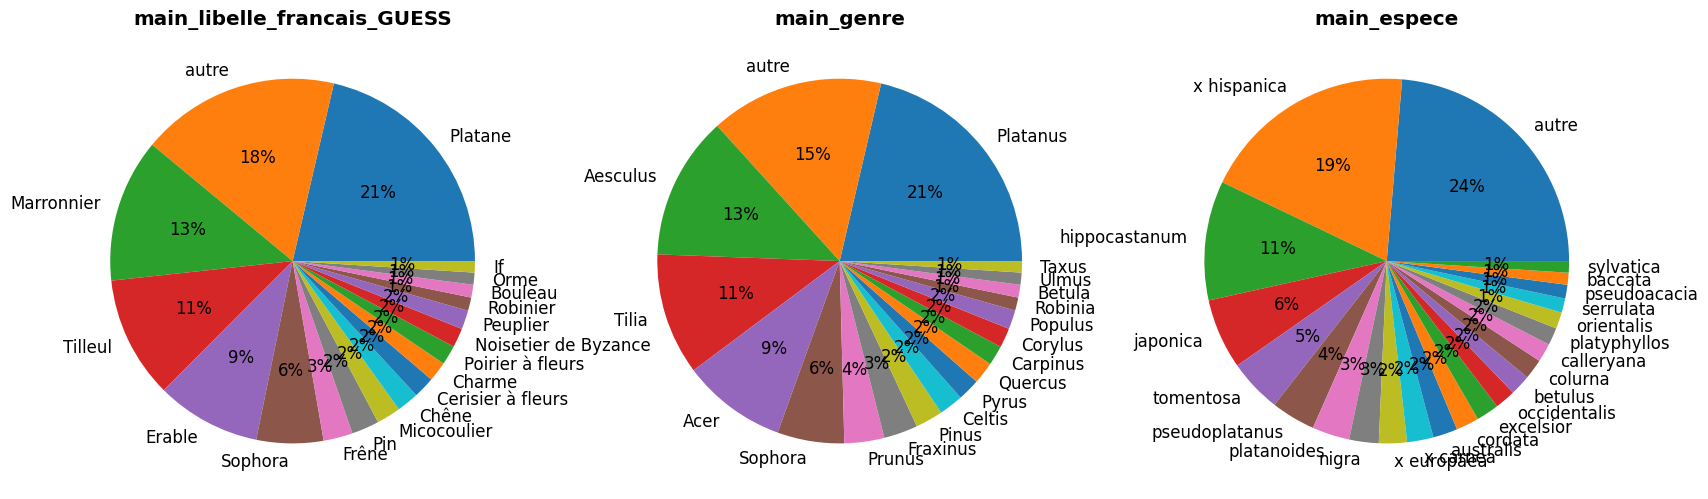

In [51]:
listColEspece=["libelle_francais_GUESS", "genre", "espece"]

for X in listColEspece :
    main=dataPropre[X].value_counts(normalize=True).loc[dataPropre[X].value_counts(normalize=True)>=0.01]
    dataPropre["main_"+X]=dataPropre[X]
    dataPropre.loc[~(dataPropre[X].isin(main.index)),"main_"+X]="autre"
    dataPropre.loc[dataPropre[X].isna(),"main_"+X]=np.NaN
    

listMain=["main_"+col for col in listColEspece]

plt.figure(figsize=(20,10))
for X in listMain :
    plt.subplot(1,3,listMain.index(X)+1)
    plt.pie(x=dataPropre[X].value_counts(normalize=True),labels=dataPropre[X].value_counts(normalize=True).index,autopct="%.0f%%")
    plt.title(X,fontweight="bold")
plt.show()

### Remplacer les catégories de `stade_developpement` par des termes plus explicites

In [52]:
#change levels of stade_developpement
dataPropre["stade_developpement"].replace({"J":"1-Jeune", "JA":"2-Jeune Adulte", "A":"3-Adulte","M":"4-Mature"},inplace=True)

dataPropre["stade_developpement"].unique()

array([nan, '3-Adulte', '1-Jeune', '4-Mature', '2-Jeune Adulte'],
      dtype=object)

## 2.3) Après le nettoyage <a class="anchor" id="P23"></a>

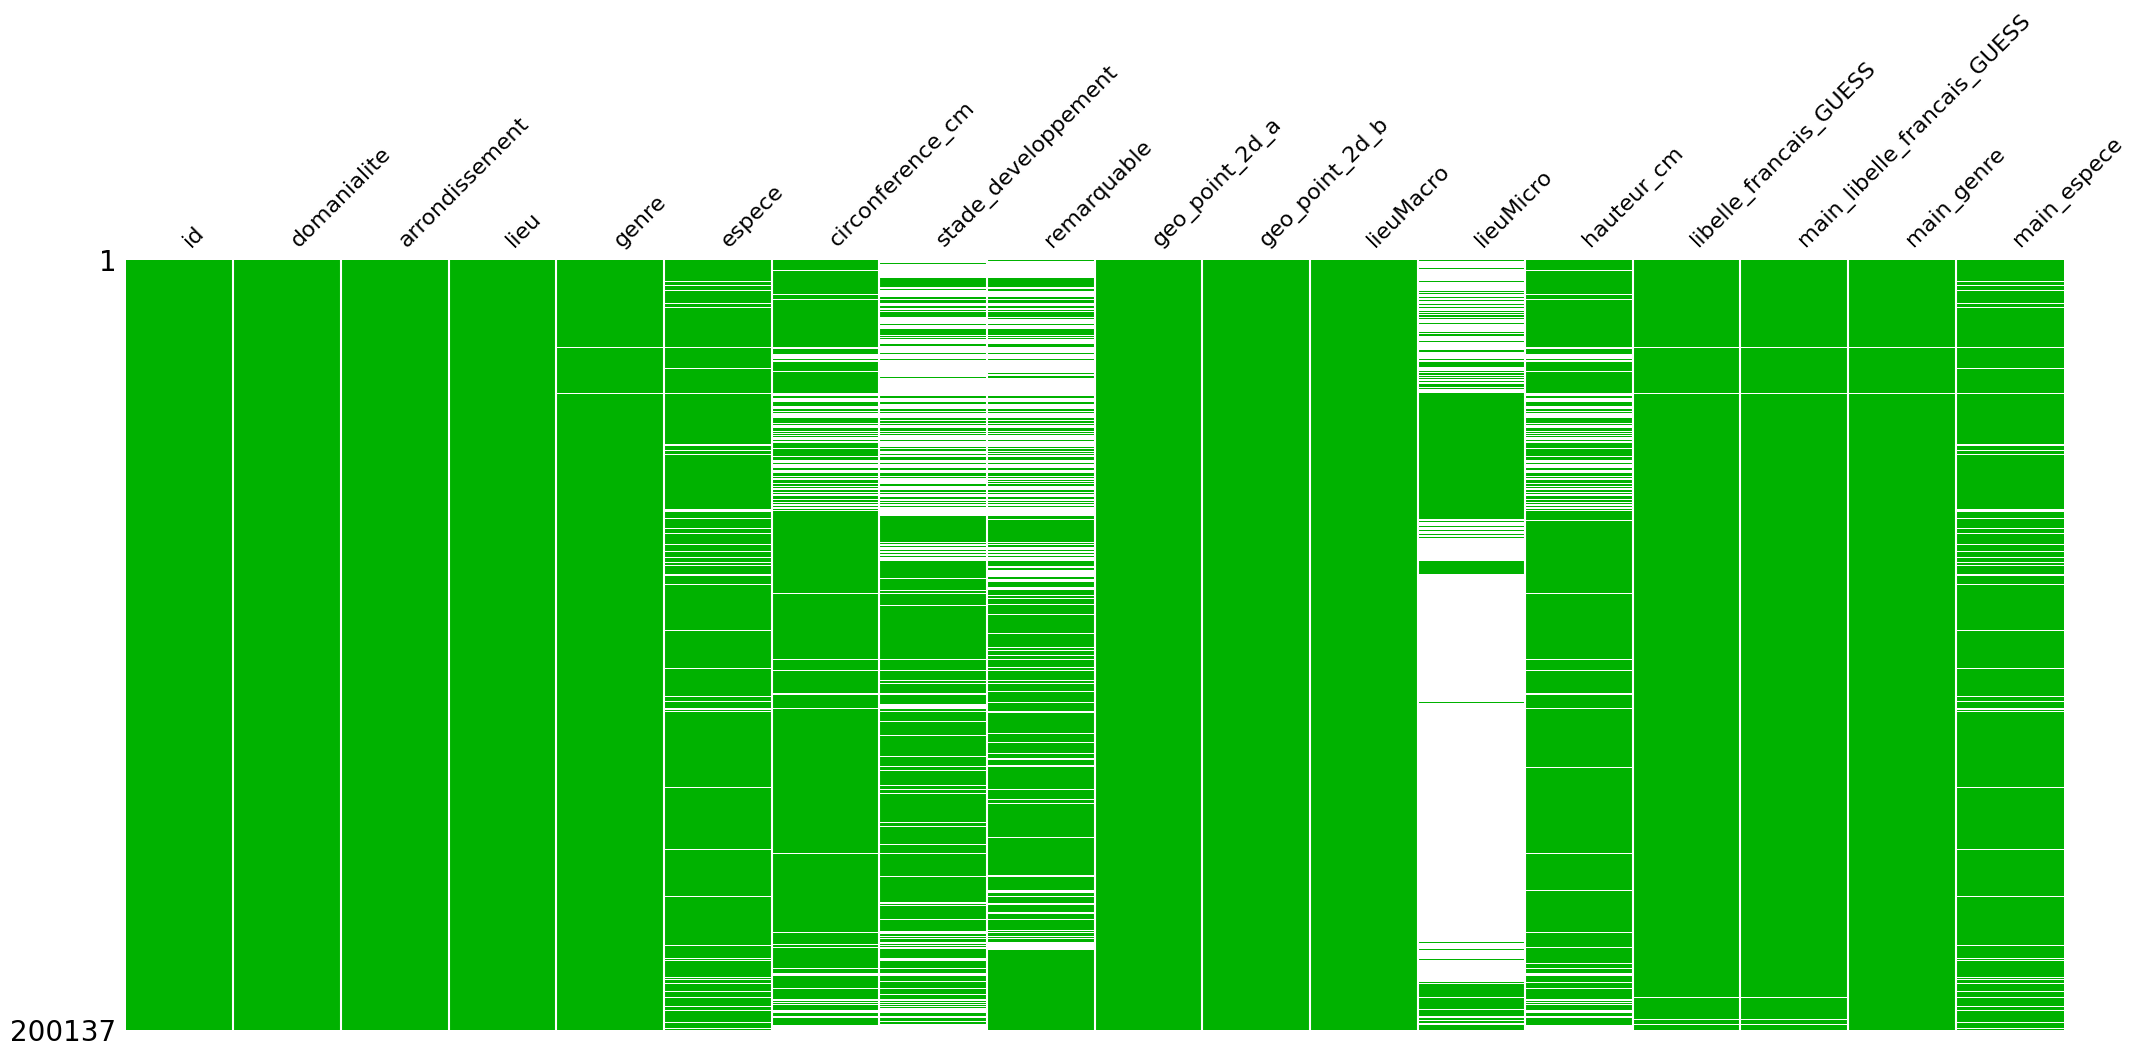

In [53]:
ms.matrix(dataPropre,color=[0.0,0.7,0.0],sparkline=False) #dataviz of missing data, AFTER cleaning
plt.show()

# PARTIE 3 - SYNTHÈSE DE L'ANALYSE DE DONNÉES<a class="anchor" id="P3"></a>

## 3.1) Optimiser les tournées - mesurer les arbres suspects <a class="anchor" id="P31"></a>

Si l'on part du principe que l'entretien d'un arbre n'est pas le même en fonction de ses dimensions (au niveau du matériel notamment), il pourrait être opportun de mener une campagne de mesurage.

Essayons de repérer où ces arbres sont situés ?

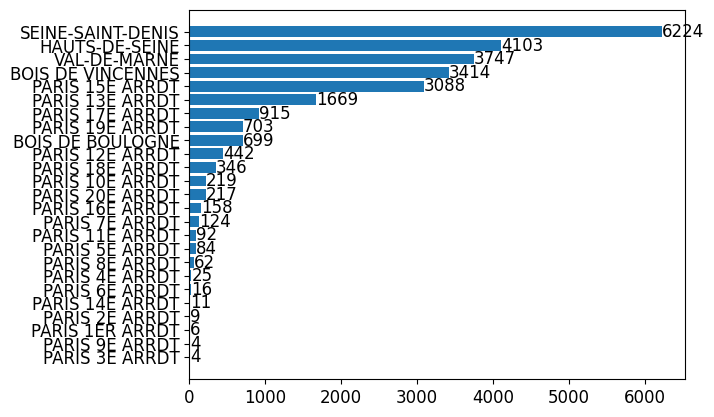

In [54]:
# focus on trees whose hauteur and circonference are NaN
dataAMesurer=dataPropre.loc[(dataPropre["hauteur_cm"].isna())|(dataPropre["circonference_cm"].isna()),:]

# in which arrondissement are they ?
A=dataAMesurer["arrondissement"].value_counts(ascending=True)

# chart
graph=plt.barh(y=A.index,width=A)
plt.bar_label(graph)
plt.show()

## Brouillon stade développement pour chaque espece

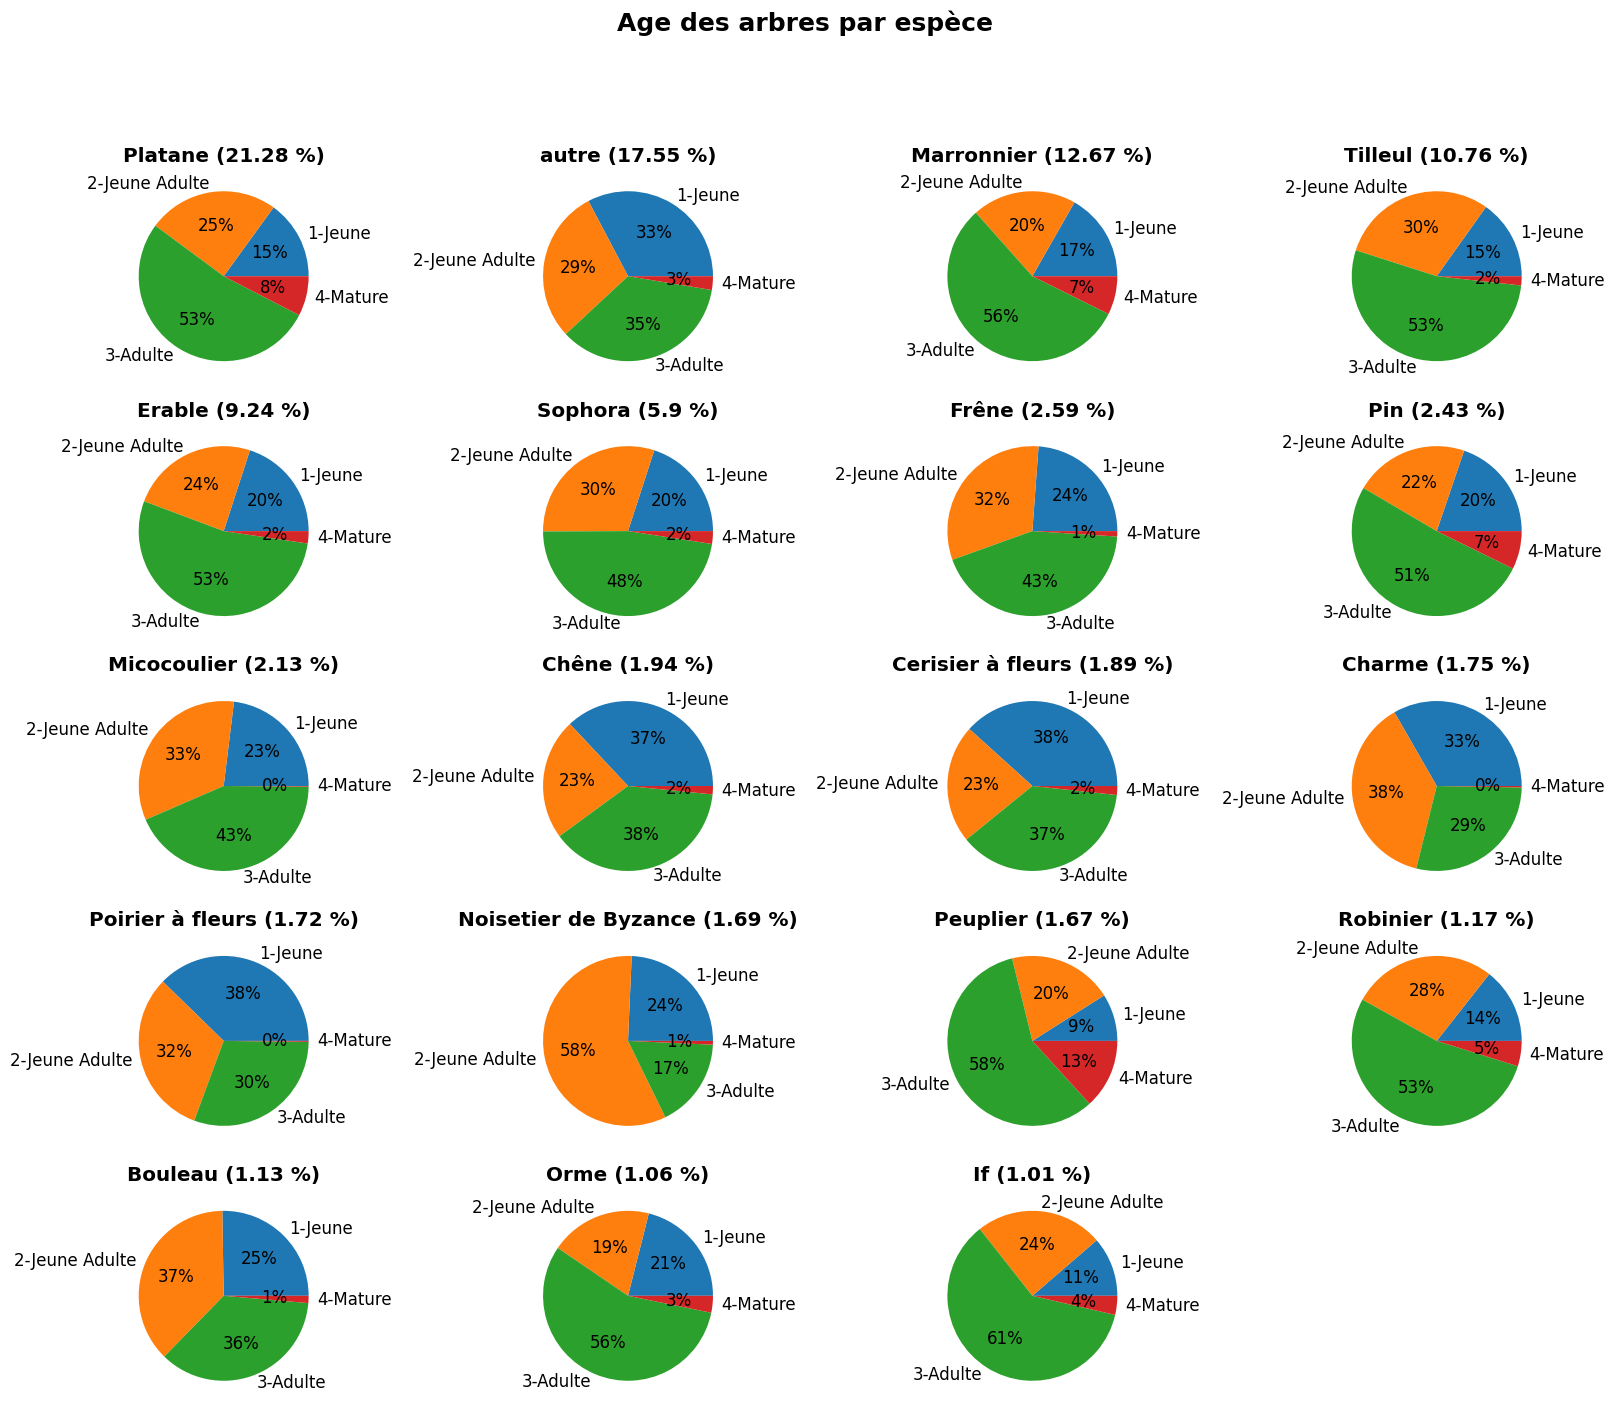

In [55]:
plt.figure(figsize=(20,16))

l=dataPropre["main_libelle_francais_GUESS"].value_counts().index.tolist()

for lib in l :
    percentLib=str(round((len(dataPropre["main_libelle_francais_GUESS"].loc[dataPropre["main_libelle_francais_GUESS"]==lib])/len(dataPropre))*100,2))+" %"    
    plt.subplot(round(len(l)/4),4,l.index(lib)+1)
    count=dataPropre.loc[dataPropre["main_libelle_francais_GUESS"]==lib,"stade_developpement"].value_counts(normalize=True).sort_index()
    plt.pie(x=count,labels=count.index,autopct="%.0f%%")
    plt.title(lib+" ("+percentLib+")",fontweight="bold")
plt.suptitle("Age des arbres par espèce", fontweight="bold",fontsize=18)
plt.show()

## Brouillon especes pour chaque stade de developpement

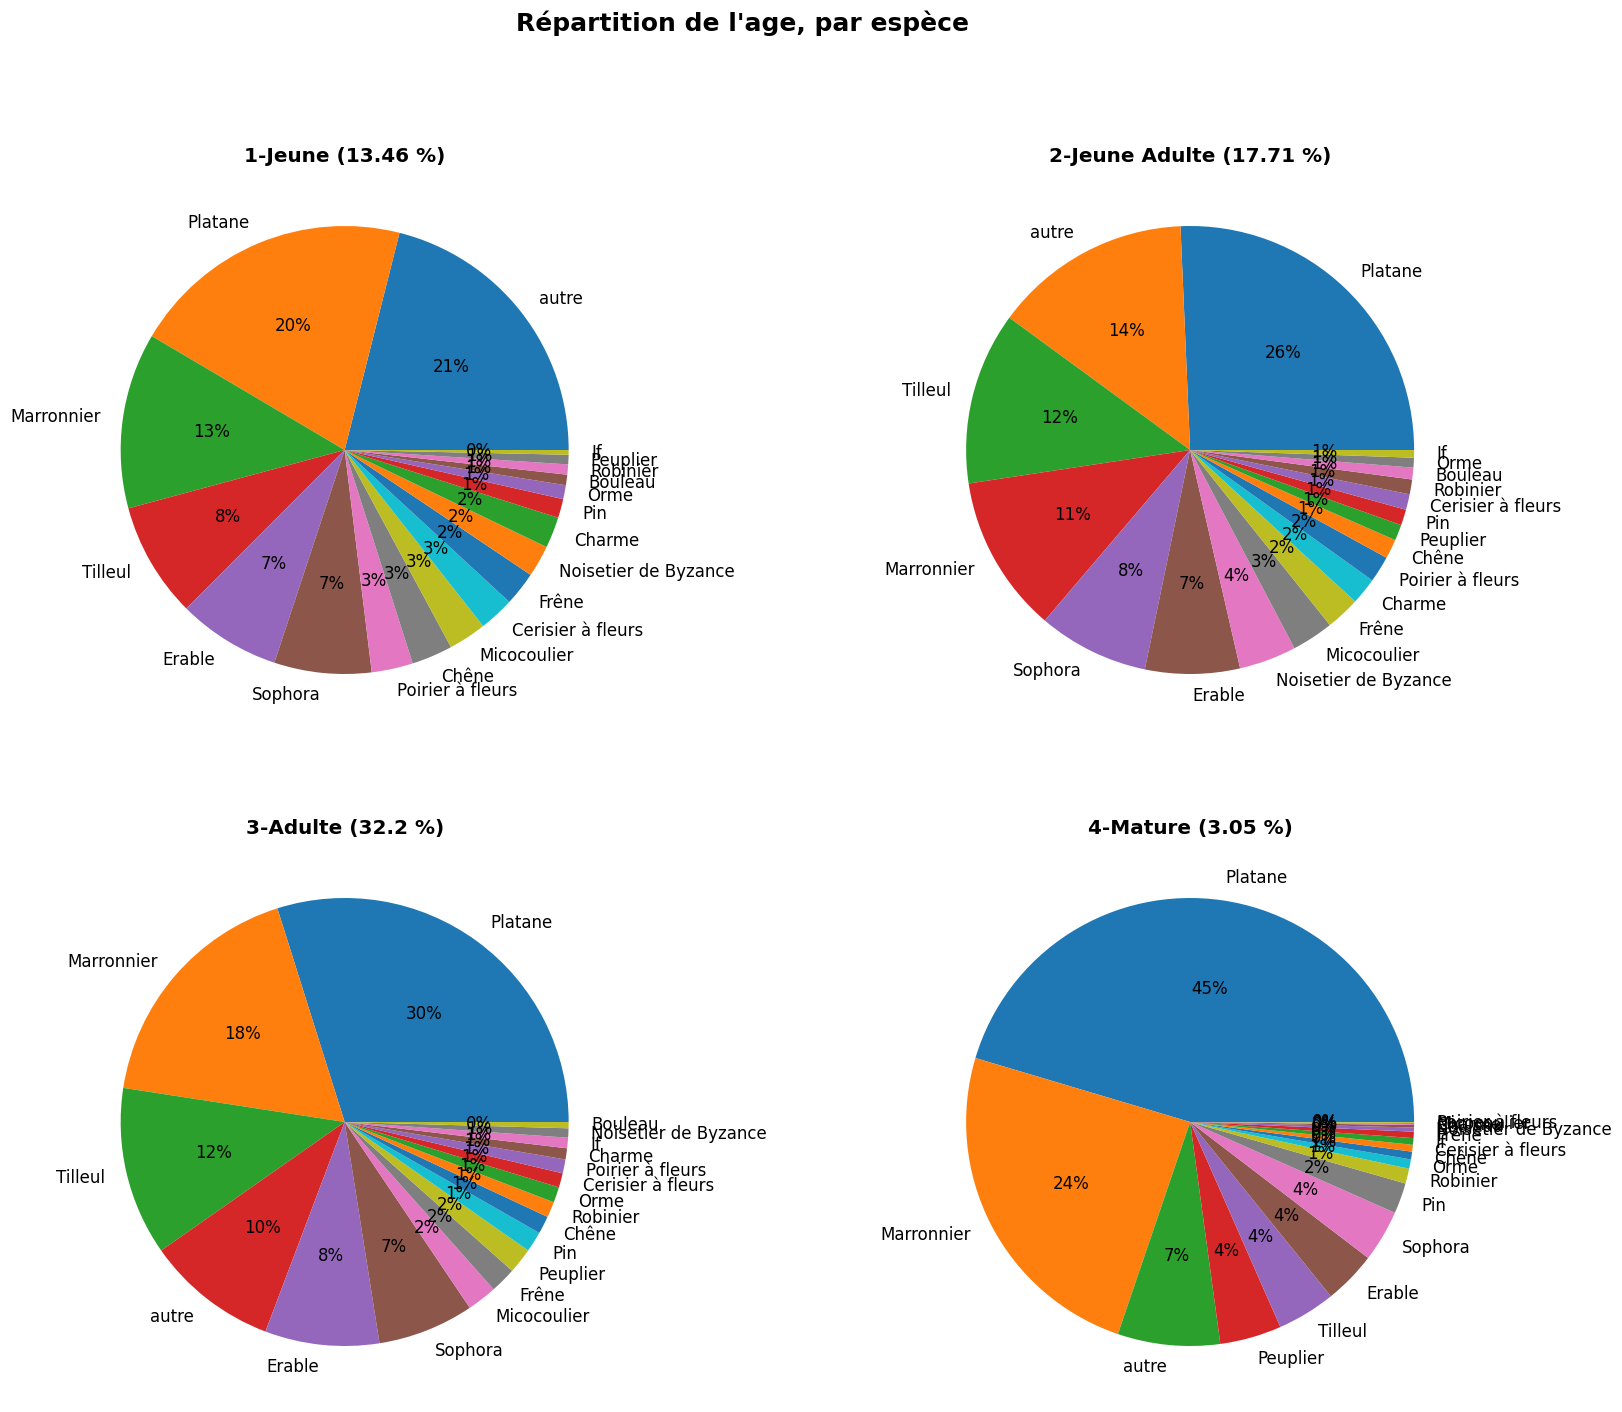

In [56]:
plt.figure(figsize=(20,16))

l=dataPropre["stade_developpement"].value_counts().sort_index().index.tolist()

for age in l :
    percentAge=str(round((len(dataPropre["stade_developpement"].loc[dataPropre["stade_developpement"]==age])/len(dataPropre))*100,2))+" %"    
    plt.subplot(2,2,l.index(age)+1)
    count=dataPropre.loc[dataPropre["stade_developpement"]==age,"main_libelle_francais_GUESS"].value_counts(normalize=True)
    plt.pie(x=count,labels=count.index,autopct="%.0f%%")
    plt.title(age+" ("+percentAge+")",fontweight="bold")
plt.suptitle("Répartition de l'age, par espèce", fontweight="bold",fontsize=18)
plt.show()

## Brouillon hauteur par stade de developpement par espece

In [57]:
test=dataPropre.pivot_table(index="main_libelle_francais_GUESS",columns="stade_developpement",values="hauteur_cm",aggfunc="mean")
test

stade_developpement,1-Jeune,2-Jeune Adulte,3-Adulte,4-Mature
main_libelle_francais_GUESS,,,,
Bouleau,543.000000,844.295302,989.965398,1218.181818
Cerisier à fleurs,419.369369,512.311558,580.241327,610.000000
Charme,532.203390,757.540264,896.899225,1420.000000
Chêne,569.654289,797.373737,1531.379731,1900.000000
Erable,564.488349,813.003739,1217.498110,1765.800866
Frêne,537.461774,810.726644,1119.346734,1603.571429
If,402.197802,525.257732,788.726514,1079.310345
Marronnier,627.987051,903.831799,1319.543058,1777.883959
Micocoulier,507.639836,751.339286,988.913043,1700.000000


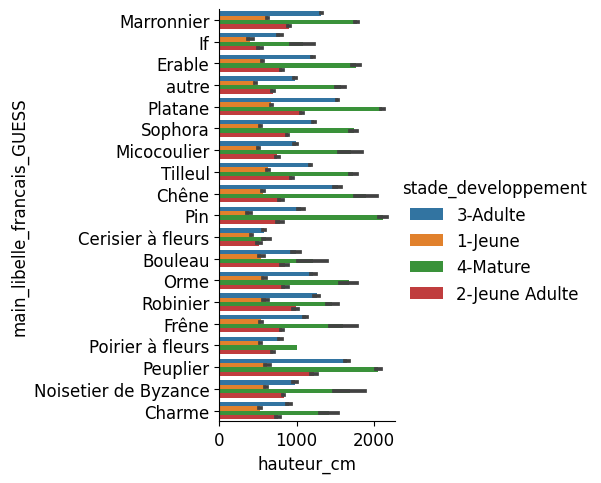

In [58]:
sns.catplot(
    data=dataPropre,
    y="main_libelle_francais_GUESS",
    x="hauteur_cm",
    hue="stade_developpement",
    kind="bar")
plt.show()

In [59]:
test=dataPropre.loc[dataPropre.hauteur_cm==0,:]
test

,id,domanialite,arrondissement,lieu,genre,espece,circonference_cm,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b,lieuMacro,lieuMicro,hauteur_cm,libelle_francais_GUESS,main_libelle_francais_GUESS,main_genre,main_espece
4,99878,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Tetradium,daniellii,38.0,NaN,NaN,48.890435,2.315289,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,NaN,0.0,Arbre à miel,autre,autre,autre
5,99879,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Tetradium,daniellii,38.0,NaN,NaN,48.890470,2.315228,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,NaN,0.0,Arbre à miel,autre,autre,autre
6,99880,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Tetradium,daniellii,37.0,NaN,NaN,48.890504,2.315168,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,NaN,0.0,Arbre à miel,autre,autre,autre
11,99885,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,Fagus,sylvatica,30.0,NaN,NaN,48.858222,2.269287,JARDIN DU RANELAGH,NaN,0.0,Hêtre,autre,autre,sylvatica
12,99887,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,Celtis,occidentalis,205.0,NaN,NaN,48.858212,2.268794,JARDIN DU RANELAGH,NaN,0.0,Micocoulier,Micocoulier,Celtis,occidentalis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196447,2020092,Jardin,PARIS 18E ARRDT,JARDIN ROSA LUXEMBOURG / 22 BIS RUE PAJOL,Prunus,padus,29.0,1-Jeune,0.0,48.888841,2.363510,JARDIN ROSA LUXEMBOURG,22 BIS RUE PAJOL,0.0,Cerisier à grappes,autre,Prunus,autre
196448,2020093,Jardin,PARIS 18E ARRDT,JARDIN ROSA LUXEMBOURG / 22 BIS RUE PAJOL,Prunus,avium,22.0,1-Jeune,0.0,48.888883,2.363533,JARDIN ROSA LUXEMBOURG,22 BIS RUE PAJOL,0.0,Merisier,autre,Prunus,autre
196449,2020094,Jardin,PARIS 18E ARRDT,JARDIN ROSA LUXEMBOURG / 22 BIS RUE PAJOL,Malus,domestica,20.0,1-Jeune,0.0,48.887848,2.362914,JARDIN ROSA LUXEMBOURG,22 BIS RUE PAJOL,0.0,Pommier à fruits,autre,autre,autre
196450,2020095,Jardin,PARIS 18E ARRDT,JARDIN ROSA LUXEMBOURG / 22 BIS RUE PAJOL,Malus,domestica,20.0,1-Jeune,0.0,48.887859,2.362920,JARDIN ROSA LUXEMBOURG,22 BIS RUE PAJOL,0.0,Pommier à fruits,autre,autre,autre


## Brouillon nombre d'arbre par age et par espece

In [60]:
dataPropre.pivot_table(index="main_libelle_francais_GUESS",columns="stade_developpement",values="id",aggfunc="count")

stade_developpement,1-Jeune,2-Jeune Adulte,3-Adulte,4-Mature
main_libelle_francais_GUESS,,,,
Bouleau,203,301,289,11
Cerisier à fleurs,679,400,664,30
Charme,601,683,516,5
Chêne,794,495,823,34
Erable,1988,2415,5306,232
Frêne,656,871,1197,28
If,91,195,488,29
Marronnier,3404,4027,11400,1487
Micocoulier,735,1066,1383,4


In [61]:
sns.catplot(
    data=dataPropre,
    y="main_libelle_francais_GUESS",
    x="id",
    kind="count")
plt.show()

ValueError: Either `x` or `y` must be None for kind='count'